# Credit Default Risk: Exploratory Data Analysis (EDA)

**Author:** Nikos Papakostas  
**Dataset:** [UCI Credit Default Dataset](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)  
**Project Type:** Exploratory Data Analysis (EDA)  

**Table of contents**<a id='toc0_'></a>    
- [EDA in Credit Default Dataset](#toc1_)    
  - [Introduction](#toc1_1_)    
    - [Dataset Reference and License](#toc1_1_1_)    
    - [Project Scope and Objectives](#toc1_1_2_)    
  - [Understanding the data](#toc1_2_)    
    - [Data validation according to the description of the reporitory's metadata](#toc1_2_1_)    
    - [Updated Variables Description for the modified DataFrame "df"](#toc1_2_2_)    
  - [Exploratory Data Analysis](#toc1_3_)    
    - [Class imbalance on the target class labels](#toc1_3_1_)    
    - [EDA on the Categorical predictors](#toc1_3_2_)    
    - [Distribution of the Categorical variables and their impact on the `Default` status](#toc1_3_3_)    
      - [`SEX` variable (*The gender of the customer*)](#toc1_3_3_1_)    
      - [`EDUCATION` variable (*The education level of the customer*)](#toc1_3_3_2_)    
      - [`MARRIAGE` variable (*The marital status of the customer*)](#toc1_3_3_3_)    
      - [`AGE` variable (*The age of the customer*)](#toc1_3_3_4_)    
      - [`Payment status variables` <small>(PAY_SEP, PAY_AUG, ..., PAY_APR)</small> (*The payment (<small>full or partial)</small> or not, made by the customer and for how long is delayed if so*)](#toc1_3_3_5_)    
    - [EDA on the **Numerical** predictors](#toc1_3_4_)    
      - [`BILL_AMT_` variables (*The Bill amount due of the credit card*)](#toc1_3_4_1_)    
      - [`PAY_AMT` variables (*The amount of payment by the customer*)](#toc1_3_4_2_)    
      - [`LIMIT BAL` variable (*The credit limit approved from the bank*)](#toc1_3_4_3_)    
      - [Visualizing Trends over time](#toc1_3_4_4_)    
    - [Identifying outliers in the dataset](#toc1_3_5_)    
    - [Checking for missing values in the dataset](#toc1_3_6_)    
    - [Checking for duplicated records in the dataset](#toc1_3_7_)    
    - [The Correlation matrix](#toc1_3_8_)    
    - [Final Summary of EDA Insights](#toc1_3_9_)    
  - [References & Further Reading](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Introduction](#toc0_)

### <a id='toc1_1_1_'></a>[Dataset Reference and License](#toc0_)

This project is based on research performed and published in 2009 by Yeh, I-Cheng, and Lien, Che-hui, which analyzed customers' default payments in a Taiwanese bank and compared the predictive accuracy of default probability among six data mining methods.

The dataset provides financial and demographic information on 30,000 credit card holders and is available in the UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients). It is licensed for research and educational purposes, enabling analysis and model development in financial risk assessment.

### <a id='toc1_1_2_'></a>[Project Scope and Objectives](#toc0_)

Credit card default prediction is crucial for financial institutions to manage risks and optimize lending strategies. This project aims to perform an Explanarory Data Analysis (EDA) that can serve as a stepping stone for developing a machine learning model to classify clients based on their likelihood of defaulting on payments, leveraging transactional and demographic data.
The insights gained can assist financial institutions in risk assessment and decision-making while answering in questions like the following: What are the most significant factors influencing credit card default?

## <a id='toc1_2_'></a>[Understanding the data](#toc0_)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# install the ucimlrepo package to access the dataset if not already installed withing the environment
! pip install ucimlrepo

In [7]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets
type(X), X.shape 
type(y), y.shape

(pandas.core.frame.DataFrame, (30000, 23))

(pandas.core.frame.DataFrame, (30000, 1))

In [8]:
repo_dict = default_of_credit_card_clients.copy()

In [9]:
repo_dict.keys()

dict_keys(['data', 'metadata', 'variables'])

In [10]:
metadata = repo_dict['metadata']
metadata

{'uci_id': 350,
 'name': 'Default of Credit Card Clients',
 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients',
 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv',
 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.",
 'area': 'Business',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 30000,
 'num_features': 23,
 'feature_types': ['Integer', 'Real'],
 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'],
 'target_col': ['Y'],
 'index_col': ['ID'],
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2009,
 'last_updated': 'Fri Mar 29 2024',
 'dataset_doi': '10.24432/C55S3H',
 'creators': ['I-Cheng Yeh'],
 'intro_paper': {'ID': 365,
  'type': 'NATIVE',
  'title': 'The comparisons of data mining techniques for the

In [11]:
dataframe = repo_dict['data']['original']
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      30000 non-null  int64
 1   X1      30000 non-null  int64
 2   X2      30000 non-null  int64
 3   X3      30000 non-null  int64
 4   X4      30000 non-null  int64
 5   X5      30000 non-null  int64
 6   X6      30000 non-null  int64
 7   X7      30000 non-null  int64
 8   X8      30000 non-null  int64
 9   X9      30000 non-null  int64
 10  X10     30000 non-null  int64
 11  X11     30000 non-null  int64
 12  X12     30000 non-null  int64
 13  X13     30000 non-null  int64
 14  X14     30000 non-null  int64
 15  X15     30000 non-null  int64
 16  X16     30000 non-null  int64
 17  X17     30000 non-null  int64
 18  X18     30000 non-null  int64
 19  X19     30000 non-null  int64
 20  X20     30000 non-null  int64
 21  X21     30000 non-null  int64
 22  X22     30000 non-null  int64
 23  X23     300

In [12]:
repo_dict['variables'][['name','description']]

,name,description
0,ID,None
1,X1,LIMIT_BAL
2,X2,SEX
3,X3,EDUCATION
4,X4,MARRIAGE
5,X5,AGE
6,X6,PAY_0
7,X7,PAY_2
8,X8,PAY_3
9,X9,PAY_4


In [13]:
variable_names = ['id', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE',
                    'AGE', 'PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY',
                    'PAY_APR', 'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
                    'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEP',
                    'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY',
                    'PAY_AMT_APR', 'default_payment_next_month']

In [14]:
df = dataframe.copy()

In [ ]:
df.columns = variable_names

### <a id='toc1_2_1_'></a>[Data validation according to the description of the reporitory's metadata](#toc0_)

In [16]:
np.sort(df['SEX'].unique())

array([1, 2], dtype=int64)

The distinct input values for the `SEX` variable in the DataFrame match the repository's metadata description (the value of 1 for Male and 2 for Female)

In [17]:
np.sort(df['EDUCATION'].unique())

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [19]:
from collections import Counter
def count_education_levels(education_series):
    return Counter(education_series)
education_counts = count_education_levels(df['EDUCATION'])
education_counts

Counter({2: 14030, 1: 10585, 3: 4917, 5: 280, 4: 123, 6: 51, 0: 14})

According to the repository's metadata description, the possible values for the `EDUCATION` variable are:   
1 = graduate school;   
2 = university;   
3 = high school; and   
4 = others,   
but the distinct possible values in the dataframe contain also the values of 0, 5 and 6.

In [18]:
percentage_edu_0 = (len(df[df['EDUCATION']==0]) / len(df)) * 100
percentage_edu_0
percentage_edu_5 = (len(df[df['EDUCATION']==5]) / len(df)) * 100
percentage_edu_5
percentage_edu_6 = (len(df[df['EDUCATION']==6]) / len(df)) * 100
percentage_edu_6
print(f"The total percentage of undocumented values for the 'EDUCATION' variable is: {(percentage_edu_0 + percentage_edu_5 + percentage_edu_6):.2f}%")

0.04666666666666667

0.9333333333333335

0.16999999999999998

The total percentage of undocumented values for the 'EDUCATION' variable is: 1.15%


Since the percentage of undocumented values for the `EDUCATION` variable represent only the 1.15% of records in the dataset, we feel comfortable to group these values along with the documented value of 4 that represent the category 'others' without altering significantly the variable's distribution

In [20]:
df['EDUCATION'] = df['EDUCATION'].replace({0:4, 5:4, 6:4})
np.sort(df['EDUCATION'].unique())

array([1, 2, 3, 4], dtype=int64)

In [22]:
count_education_levels(df['EDUCATION'])

Counter({2: 14030, 1: 10585, 3: 4917, 4: 468})

In [23]:
np.sort(df['MARRIAGE'].unique())

array([0, 1, 2, 3], dtype=int64)

According to the repository's metadata description the possible values for the `MARRIAGE` variable are:   
1 = married;   
2 = single; and   
3 = other, but the distinct possible values in the dataframe contain also the value of 0

In [24]:
percentage_marital_status_0 = (len(df[df['MARRIAGE']==0]) / len(df)) * 100
percentage_marital_status_0
print(f"The percentage of undocumented values for the 'MARRIAGE' variable is: {(percentage_marital_status_0):.2f}%")

0.18

The percentage of undocumented values for the 'MARRIAGE' variable is: 0.18%


Similarly to the case of the `EDUCATION` variable we feel comfortable with replacing the undocumented value of 0 with the value of 3 that represents the marital status 'other' in the `MARRIAGE` variable.

In [25]:
df['MARRIAGE'] = df['MARRIAGE'].replace({0:3})
np.sort(df['MARRIAGE'].unique())

array([1, 2, 3], dtype=int64)

In [26]:
print(Counter(df['MARRIAGE']))

Counter({2: 15964, 1: 13659, 3: 377})


In [27]:
np.sort(df['PAY_SEP'].unique())
np.sort(df['PAY_AUG'].unique())
np.sort(df['PAY_JUL'].unique())
np.sort(df['PAY_JUN'].unique())
np.sort(df['PAY_MAY'].unique())
np.sort(df['PAY_APR'].unique())

array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

array([-2, -1,  0,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

array([-2, -1,  0,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

According to the repository's metadata description the possible values for the variables `PAY_SEP`, `PAY_AUG` and so on are:   
-1 = paid duly;    
1 = 1 month payment delay;   
. . .;    
8 = 8 months payment delay;   
9 = 9 months and above payment delay, but the dataframe contains also the distinct values of -2 and 0 and also does not include the value of 9.
This needs some further investigation in order to understand what these values might represent before making any assumption on their handling.

In [28]:
df[(df['BILL_AMT_SEP']== 0) & (df['BILL_AMT_AUG']== 0) & (df['BILL_AMT_JUL']==0) & (df['BILL_AMT_JUN']== 0) &
   (df['BILL_AMT_MAY']== 0) & (df['BILL_AMT_APR']== 0)][['PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']].value_counts()

PAY_AUG  PAY_JUL  PAY_JUN  PAY_MAY  PAY_APR
-2       -2       -2       -2       -2         866
Name: count, dtype: int64

From the above result we can see that all customers who consistently receive a zero Bill amount throughout the period of April up to September the only observed value of the payment status is -2. This leads us to assume with confidence that the value of -2 for the repayment status variable refers to credit cards with no usage or to inactive cards.

We can further justify the above inference by observing the payment amount made by the credit card holders across the months when the repayment status remains at the value of -2. If indeed the repayment status with value -2 refers to zero card transactions or inactive credit cards, then the payments amount will cluster around 0 where some small payment amounts might occur possibly due to accrued interest.

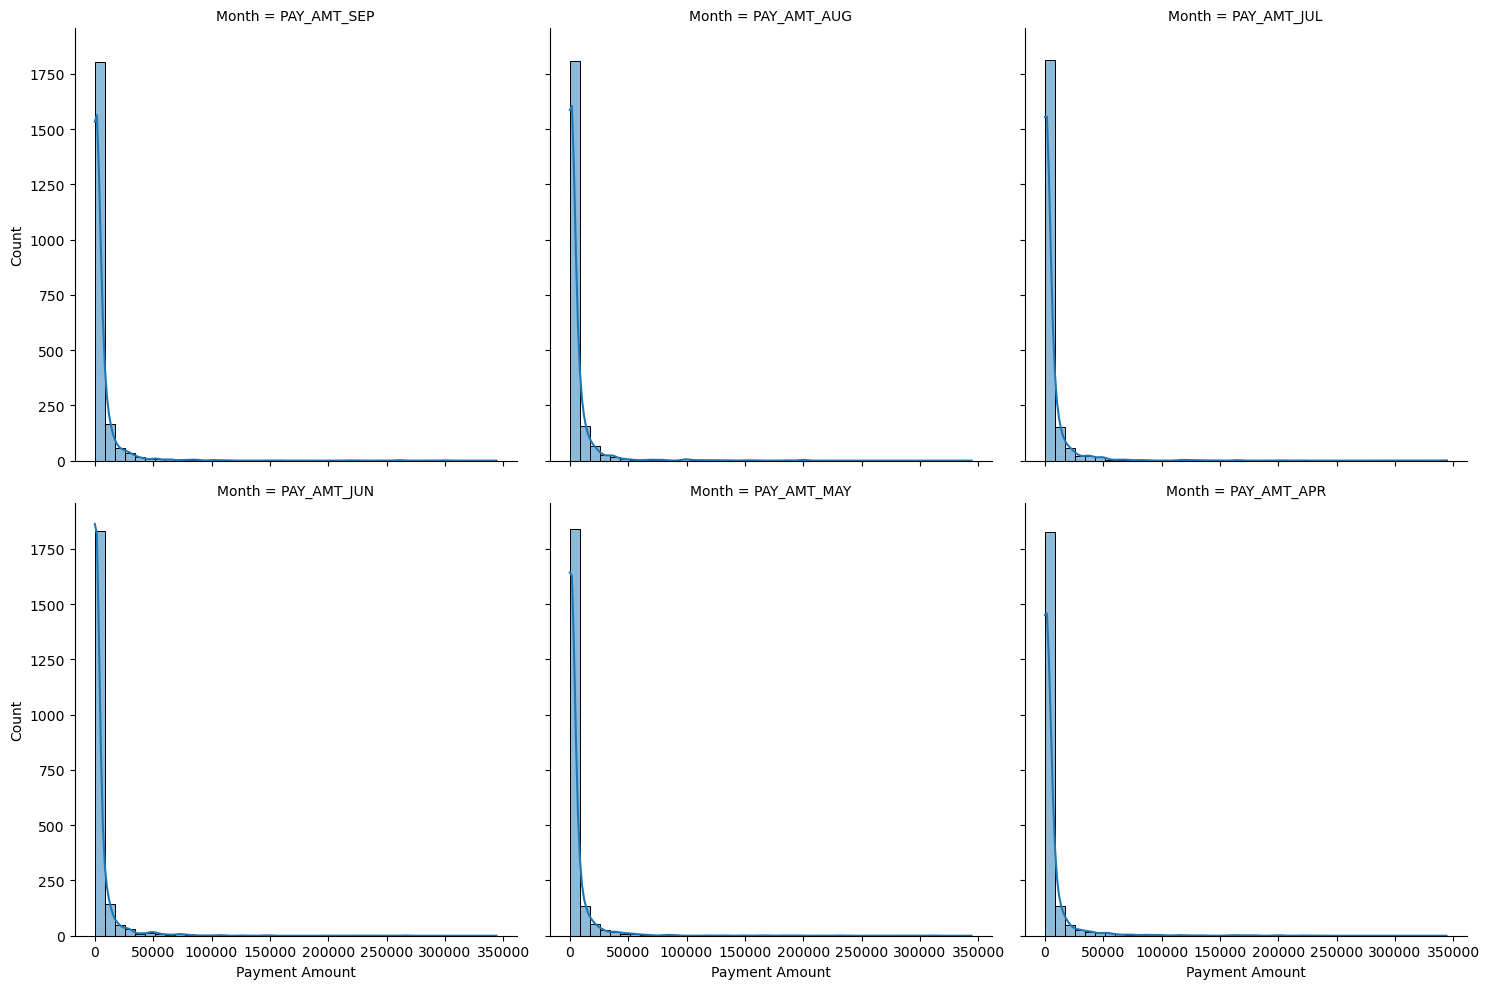

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the PAY_* columns
pay_columns = ['PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

# Filter the dataframe to only include rows where all PAY_* columns are -2
filtered_minus_two_df = df[(df[pay_columns] == -2).all(axis=1)]

# Define the columns to plot
payments_amount = ['PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

payments_df = filtered_minus_two_df[payments_amount]

df_long = payments_df.melt(value_vars=payments_amount, var_name="Month", value_name="Payment Amount")

plot = sns.displot(df_long, x="Payment Amount", col="Month", bins=40, kde=True, col_wrap=3)

plt.show()


One last thing we can check in order to solidify our assumption is to check how the bill amount changes from month to month when the repayment status is fixed at -2. If indeed the repayment status at value of -2 refers to zero transactions from the customer or to inactive credit cards, then the bill amount across the months will remain the same and the difference between the months will be zero. Some small differences though will be observed as mentioned earlier, possibly due to accrued interest.

C:\Users\papak\AppData\Local\Temp\ipykernel_8736\276883588.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = plt.legend(title="Month Difference")


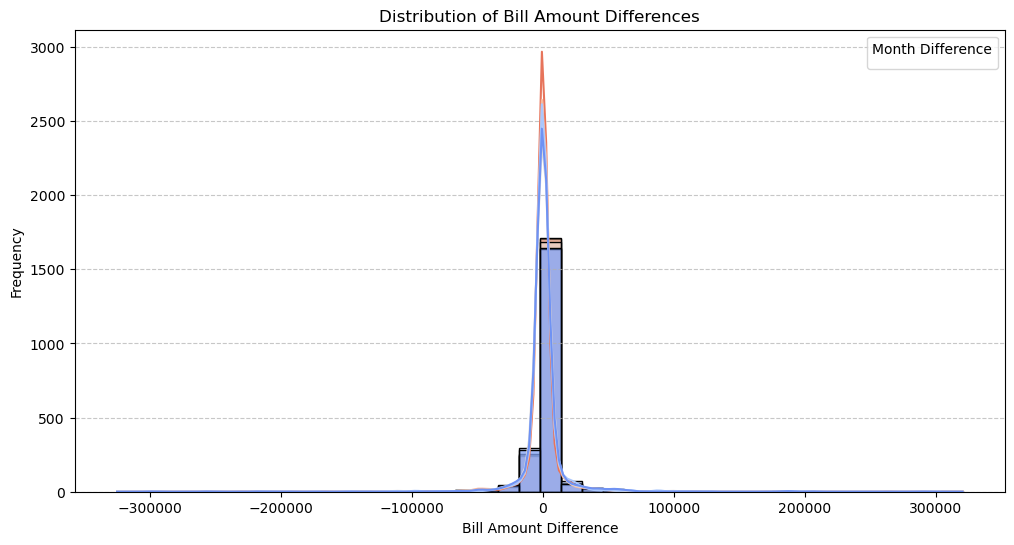

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the BILL_AMT_* columns
bill_columns = ['BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']

# Compute all month-to-month differences
diffs = {}
for i in range(len(bill_columns) - 1):
    diffs[f"DIFF_{bill_columns[i]}_{bill_columns[i+1]}"] = filtered_minus_two_df[bill_columns[i]] - filtered_minus_two_df[bill_columns[i+1]]

# Convert dictionary to DataFrame
df_diffs = pd.DataFrame(diffs)

# Reshape DataFrame for Seaborn (melt long format)
df_long = df_diffs.melt(var_name="Month_Difference", value_name="Difference")

# Plot histogram for all differences
figure = plt.figure(figsize=(12, 6))
plot = sns.histplot(data=df_long, x="Difference", hue="Month_Difference", bins=40, kde= True, palette="coolwarm")

# Customize
title = plt.title("Distribution of Bill Amount Differences")
xlabel = plt.xlabel("Bill Amount Difference")
ylabel = plt.ylabel("Frequency")
legend = plt.legend(title="Month Difference")
grid =plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

As expected, the Bill amount difference across the months clusters around 0 when the repayment status is fixed at the value of -2.   
Therefore, we shall accept the assumption that the observed value of -2 in the variables `PAY_*` refers to zero transactions or inactive credit card.

Now we will proceed to examine what exactly is happening when the repayment status for the PAY_* variables take the <u>undocumented</u> value of 0. How does the bill amount evolve over time?

In [31]:
import pandas as pd
import numpy as np

# Define columns
pay_status_columns = ['PAY_APR', 'PAY_MAY', 'PAY_JUN', 'PAY_JUL', 'PAY_AUG', 'PAY_SEP']
bill_columns = ['BILL_AMT_APR', 'BILL_AMT_MAY', 'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEP']
pay_amt_columns = ['PAY_AMT_APR', 'PAY_AMT_MAY', 'PAY_AMT_JUN', 'PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEP']

# Filter only rows where PAY_* = 0 (on-time payments)
filtered_zero_df = df[(df[pay_status_columns] == 0).all(axis=1)]


<Figure size 1000x500 with 0 Axes>

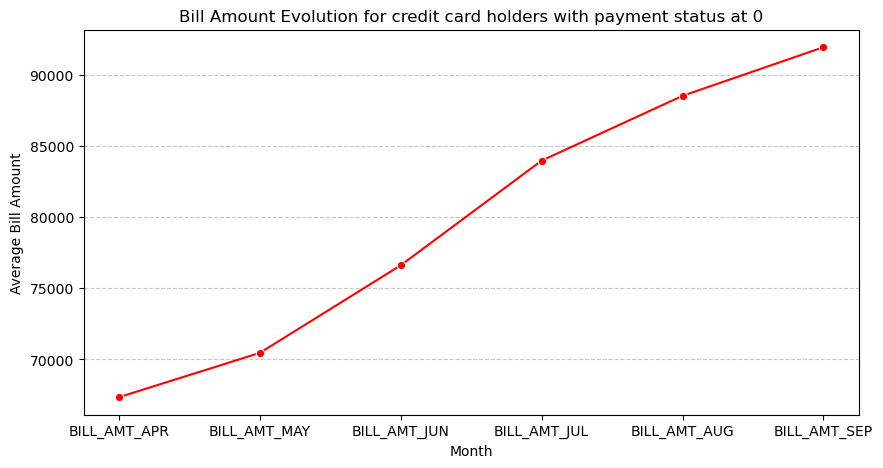

In [32]:
# Compute average bill evolution
bill_amount_evolution = filtered_zero_df[bill_columns].mean()

# Plot
plt.figure(figsize=(10, 5))
plot = sns.lineplot(x=bill_columns, y=bill_amount_evolution, marker="o", color="red")
title = plt.title("Bill Amount Evolution for credit card holders with payment status at 0")
ylabel = plt.ylabel("Average Bill Amount")
xlabel = plt.xlabel("Month")
grid = plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [33]:
# Check if all customers with PAY_* = 0 made a payment (PAY_AMT_* != 0)
non_zero_payments = (filtered_zero_df[pay_amt_columns] != 0).any(axis=1)

# Count customers where PAY_AMT_* is always nonzero
paying_customers_count = non_zero_payments.sum()

# Compare total customers with PAY_* = 0
total_customers = len(filtered_zero_df)

# Display results
print(f"Total customers with PAY_* = 0: {total_customers}")
print(f"Customers who always make a payment (PAY_AMT_* != 0): {paying_customers_count}")

Total customers with PAY_* = 0: 9821
Customers who always make a payment (PAY_AMT_* != 0): 9820


In [34]:
# Find customers where PAY_* = 0 but they made NO payments
no_payment_mask = (filtered_zero_df[pay_amt_columns] == 0).all(axis=1)
no_payment_df = filtered_zero_df[no_payment_mask]

# Display the filtered customers
no_payment_df.head()

print(f"Number of customers with PAY_* = 0 but PAY_AMT_* = 0: {len(no_payment_df)}")

,id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month
28984,28985,180000,2,1,2,35,0,0,0,0,...,150,150,150,0,0,0,0,0,0,1


Number of customers with PAY_* = 0 but PAY_AMT_* = 0: 1


From the above results we can see that all customers in the dataset with their repayment status set at 0 throughout the whole period, their billing amount is constantly increasing while still making a single payment in the same period, probably in order to avoid being delinquent.   
From the above we can confidently accept the assumption that the undocumented value of 0 for the repayment status refers to customers who made use of revolving credit. (this means they made payments but not fully repaid their total credit balance).

The documented value of 9 for the repayment status is not present in the dataset. We also accept that the months of delay were recorded in the bank’s books up to the 8th month and no more.

The `BILL_AMT_*` and `PAY_AMT_*` variables take reasonable values, thus we will not further inspect them. Nevertheless, we still have to note that some Bill amount statements take negative values which is possible and very common in cases where a customer makes a payment which exceeds their purchases with the use of their credit card and therefore the statement produced will contain a negative bill amount.

- Target/response variable `default_payment_next_month`

In [35]:
np.sort(df['default_payment_next_month'].unique())

array([0, 1], dtype=int64)

The target/response variable of the dataset named 'default_payment_next_month' takes only the values of 0 and 1.   
0 stands for non-defaulters and 1 for customers with a credit default meaning being unable to repay their debt.

### <a id='toc1_2_2_'></a>[Updated Variables Description for the modified DataFrame "df"](#toc0_)

<u>The independent variables (predictors) X</u>   
- `LIMIT_BAL`: Amount of the given credit: it includes both the individual consumer credit and his/her family (supplementary) credit.   

- `SEX`: Gender (1 = male; 2 = female)

- `EDUCATION`: Education (4 = graduate school; 3 = university; 2 = high school; 1 = others)  

- `MARRIAGE`: Marital status (1 = married; 2 = single; 3 = others)

- `AGE_GROUP`: Age group (1 = Young Adults [0-34], 2 = Middle-Aged [35-54], 3 = Older Adults [55+])

- `PAY_*`: the repayment status in September, August, July and so on <small>(1 = no credit card usage or inactive credit card; 2 = paid duly; 3 = make use of revolving credit; 4 = 1 month past due; 5 = 2 months past due; . . .; 11 = 8 months past due;)</small>.
  
- `BILL_AMT_*`: amount of bill statement in September, August, July and so on

- `PAY_AMT_*`: amount paid in September, August, July and so on

<u>The binary target variable y</u>   
- `default_payment_next_month` (Yes = 1, No = 0)   

<small>Please note that all amounts in the dataset's variables refer to Taiwan's local currency (NT dollars)</small>

## <a id='toc1_3_'></a>[Exploratory Data Analysis](#toc0_)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   id                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_SEP                     30000 non-null  int64
 7   PAY_AUG                     30000 non-null  int64
 8   PAY_JUL                     30000 non-null  int64
 9   PAY_JUN                     30000 non-null  int64
 10  PAY_MAY                     30000 non-null  int64
 11  PAY_APR                     30000 non-null  int64
 12  BILL_AMT_SEP                30000 non-null  int64
 13  BILL_AMT_AUG                30000 non-null  int64
 14  BILL_A

**Dataset description**   
The dataset consists of 30.000 records for 23 predictor variables and a binary target variable with possible values 0 and 1.   
Ten (10) predictors are categorical taking distinct integer values, each representing a specific category and the rest 13 predictors are continuous numeric variables.   
Before proceeding with the exploration of the dataset it would be wise to separate them into lists and investigate further their behavior separately. This action will also aim at any modifications on them such as scaling and encoding before any attempt for modeling (although automated solutions are available for such tasks, manual exploration can help us gain further intuition with the problem at hand).

In [ ]:
# Define categorical variables (ordinal & nominal)
categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                    'PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

# Define purely numeric variables
continuous_vars = ['LIMIT_BAL', 'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
                   'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
                   'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
                   'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

# Verify the split
print(f"Categorical Variables: {categorical_vars}")
print(f"Numeric Variables: {continuous_vars}")

Categorical Variables: ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
Numeric Variables: ['LIMIT_BAL', 'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']


### <a id='toc1_3_1_'></a>[Class imbalance on the target class labels](#toc0_)

Before proceeding with the analysis of predictor variables, it is essential to first examine the distribution of the target variable. Understanding its behavior independently from the predictors allows us to assess potential class imbalances and establish a baseline for the analysis that follows.

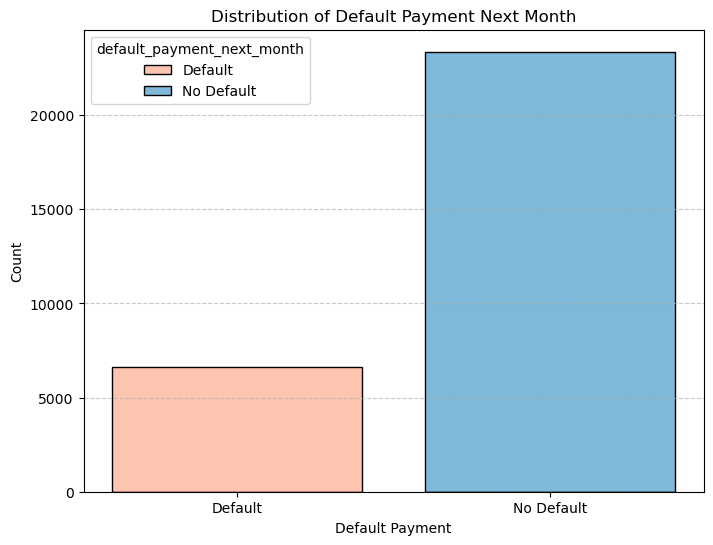

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a mapping dictionary for the target classes
default_labels = {0: 'No Default', 1: 'Default'}

# Define a fixed color palette for consistency
target_palette = {"No Default": "#0072B2", "Default": "#FC8D62"}

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
# Plot the target variable distribution
plot = sns.histplot(data=df,
                    x=df['default_payment_next_month'].replace(default_labels),
                    hue=df['default_payment_next_month'].replace(default_labels),
                    discrete=True,
                    shrink=0.8,
                    palette=target_palette,
                    ax=ax)

# Formatting
title = ax.set_title("Distribution of Default Payment Next Month")
ylabel = ax.set_ylabel('Count')
xlabel = ax.set_xlabel('Default Payment')
grid = plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show Plot
plt.show()

In [40]:
non_defaulters = df['default_payment_next_month'].value_counts()[0]
defaulters = df['default_payment_next_month'].value_counts()[1]
prop_non_defaulters = (non_defaulters / len(df) * 100).round(2)
prop_defaulters = (defaulters / len(df) * 100).round(2)

**Target Variable: Default Payment Next Month**

The dataset consists of 23364 non-defaulters (77.88%) and 6636 defaulters (22.12%).

    Non-Defaulters (0): 23364 customers (77.88%)
    Defaulters (1): 6636 customers (22.12%)

This distribution shows that the dataset is imbalanced, with a much larger proportion of non-defaulters than defaulters. When building predictive models, we may need to handle this imbalance with resampling techniques such as oversampling with SMOTE for example.

### <a id='toc1_3_2_'></a>[EDA on the Categorical predictors](#toc0_)

### <a id='toc1_3_3_'></a>[Distribution of the Categorical variables and their impact on the `Default` status](#toc0_)

#### <a id='toc1_3_3_1_'></a>[`SEX` variable (*The gender of the customer*)](#toc0_)

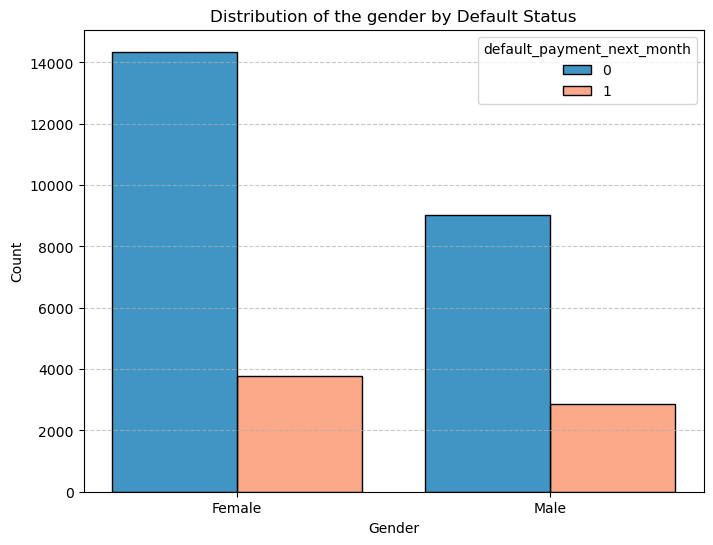

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a mapping dictionary for categorical labels
sex_labels = {1: 'Male', 2: 'Female'}

sex_palette = {0: "#0072B2", 1: "#FC8D62"}

fig, ax = plt.subplots(figsize=(8, 6))
plot = sns.histplot(data=df,
                    x=df['SEX'].replace(sex_labels),  # Apply mapping only for visualization
                    hue='default_payment_next_month',
                    multiple="dodge",
                    discrete=True,
                    shrink=0.8,
                    palette=sex_palette,
                    ax=ax)

# Formatting
title = ax.set_title("Distribution of the gender by Default Status")
ylabel = ax.set_ylabel('Count')
xlabel = ax.set_xlabel('Gender')
grid = plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show Plot
plt.show()

In [42]:
gender_counts = df['SEX'].value_counts()
male = gender_counts[1]
female = gender_counts[2]
prop_male = (gender_counts[1] / len(df) * 100).round(2)
prop_female = (gender_counts[2] / len(df) * 100).round(2)
female_defaulters = df[df['SEX'] == 2]['default_payment_next_month'].value_counts()[1]
male_defaulters = df[df['SEX'] == 1]['default_payment_next_month'].value_counts()[1]
prop_male_defaulters = (male_defaulters / gender_counts[1] * 100).round(2)
prop_female_defaulters = (female_defaulters / gender_counts[2] * 100).round(2)

**Gender and Default Payment Distribution**

The dataset consists of 11888 males (39.63%) and 18112 females (60.37%).

    Total Non-Defaulters: 23364 (77.88% of all customers)
    Total Defaulters: 6636 (22.12% of all customers)

Gender-Based Default Analysis

    Male Defaulters: 2873 (24.17% of males)
    Female Defaulters: 3763 (20.78% of females)

Even though females make up the majority of the dataset (60.37%), the relative proportion of defaulters within each gender group reveals interesting insights.

    Males have a higher likelihood of defaulting (24.17%) compared to females (20.78%).
    This suggests that, proportionally, males tend to default more frequently than females, even though more female customers exist overall.

Further Statistical Validation Needed

Whether the slightly higher relative tendency of males to default is statistically significant or not, needs to be further analyzed.

Next step to evaluate if there is a statistically significant association between the `SEX` variable and the default status is to perform a chi-square test of independence.

[Read more about the Chi-Square Test of Independence here](https://www.scribbr.com/statistics/chi-square-test-of-independence/)

In [43]:
import scipy.stats as stats

# Create contingency table for SEX vs Default Status
gender_contingency_table = pd.crosstab(df['SEX'], df['default_payment_next_month'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(gender_contingency_table)

# Display results
print("Contingency Table:\n", gender_contingency_table)
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"p-Value: {p_value:.2e}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("\nThe relationship between Gender and Default Status is **statistically significant** (p < 0.05).")
else:
    print("\nNo statistically significant relationship found between Gender and Default Status (p >= 0.05).")

Contingency Table:
 default_payment_next_month      0     1
SEX                                    
1                            9015  2873
2                           14349  3763

Chi-Square Test Results:
Chi-Square Statistic: 47.7088
Degrees of Freedom: 1
p-Value: 4.94e-12

The relationship between Gender and Default Status is **statistically significant** (p < 0.05).


The Chi-Square test indicates a statistically significant relationship between gender and default status. This suggests that the observed differences in default rates across the gender classes are unlikely due to random chance.   
Therefore, `SEX` variable can serve as a predictor for determining a customer's likelihood of default. However further analysis is needed to explore potential interactions with other variables that may influence this relationship.

#### <a id='toc1_3_3_2_'></a>[`EDUCATION` variable (*The education level of the customer*)](#toc0_)

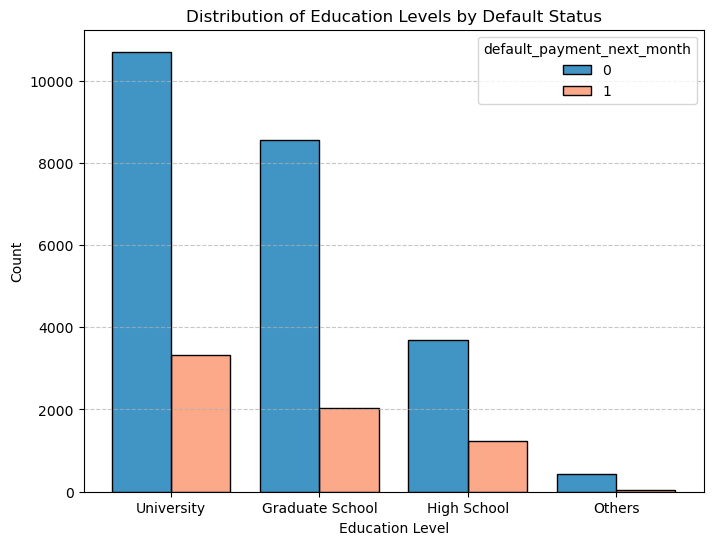

In [44]:
#Create the mapping dictionary for the labels
educational_level_labels = {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'}

# Define a custom color palette for this specific plot
education_palette = {0: "#0072B2", 1: "#FC8D62"}

fig, ax = plt.subplots(figsize=(8, 6))
plot = sns.histplot(data=df,
                    x=df['EDUCATION'].replace(educational_level_labels),
                    hue='default_payment_next_month',
                    multiple="dodge",
                    discrete=True,
                    shrink=0.8,
                    palette=education_palette,
                    ax=ax)

# Formatting
title = ax.set_title("Distribution of Education Levels by Default Status")
ylabel = ax.set_ylabel('Count')
xlabel = ax.set_xlabel('Education Level')
grid = plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show Plot
plt.show()

In [45]:
# Compute education category counts
education_degree_counts = df['EDUCATION'].value_counts()

# Assign education category counts
graduate_school = education_degree_counts[1]
university = education_degree_counts[2]
high_school = education_degree_counts[3]
others = education_degree_counts[4]

# Compute defaulters per education level
university_defaulters = df[df['EDUCATION'] == 2]['default_payment_next_month'].value_counts()[1]
graduate_school_defaulters = df[df['EDUCATION'] == 1]['default_payment_next_month'].value_counts()[1]
high_school_defaulters = df[df['EDUCATION'] == 3]['default_payment_next_month'].value_counts()[1]
others_defaulters = df[df['EDUCATION'] == 4]['default_payment_next_month'].value_counts()[1]

# Compute defaulter proportions
prop_university_defaulters = (university_defaulters / education_degree_counts[2] * 100).round(2)
prop_graduate_school_defaulters = (graduate_school_defaulters / education_degree_counts[1] * 100).round(2)
prop_high_school_defaulters = (high_school_defaulters / education_degree_counts[3] * 100).round(2)
prop_others_defaulters = (others_defaulters / education_degree_counts[4] * 100).round(2)

# Compute non-defaulters per education level
university_non_defaulters = education_degree_counts[2] - university_defaulters
graduate_school_non_defaulters = education_degree_counts[1] - graduate_school_defaulters
high_school_non_defaulters = education_degree_counts[3] - high_school_defaulters
others_non_defaulters = education_degree_counts[4] - others_defaulters

# Compute non-defaulter proportions
prop_university_non_defaulters = (university_non_defaulters / education_degree_counts[2] * 100).round(2)
prop_graduate_school_non_defaulters = (graduate_school_non_defaulters / education_degree_counts[1] * 100).round(2)
prop_high_school_non_defaulters = (high_school_non_defaulters / education_degree_counts[3] * 100).round(2)
prop_others_non_defaulters = (others_non_defaulters / education_degree_counts[4] * 100).round(2)

Education Level and Default Payment Analysis

The dataset consists of customers with different education levels, and we analyze their default rates below.
Breakdown of Customers by Education Level

    Graduate School: 10585 customers
    University: 14030 customers
    High School: 4917 customers
    Others: 468 customers

Default Rates by Education Level

    Graduate School: 2036 defaulters (19.23%)
    University: 3330 defaulters (23.73%)
    High School: 1237 defaulters (25.16%)
    Others: 33 defaulters (7.05%)

Non-Default Rates by Education Level

    Graduate School: 8549 non-defaulters (80.77%)
    University: 10700 non-defaulters (76.27%)
    High School: 3680 non-defaulters (74.84%)
    Others: 435 non-defaulters (92.95%)

Key Observations

    The default rates vary across education levels, with university and high school graduates showing a higher tendency toward default.
    Customers classified under "Others" education level has a different default pattern compared to the other categories but this can be likely to its small presence in the dataset in the first place (only 468 customers out of 30.000).
    Further statistical analysis is needed to determine if education level significantly influences default behavior.

Next step in evaluating whether there is a statistically significant association between the `EDUCATION` variable and the default status is to perform a Chi-Square test of independence.

In [46]:
import scipy.stats as stats
import pandas as pd

# Create contingency table
education_contingency_table = pd.crosstab(df['EDUCATION'], df['default_payment_next_month'])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(education_contingency_table)

# Display results
print("Contingency Table:\n", education_contingency_table)
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"p-Value: {p_value:.2e}")

# Interpretation
if p_value < 0.05:
    print("\nThe relationship between Education Level and Default Status is **statistically significant** (p < 0.05).")
else:
    print("\nNo significant relationship found between Education Level and Default Status (p ≥ 0.05).")

Contingency Table:
 default_payment_next_month      0     1
EDUCATION                              
1                            8549  2036
2                           10700  3330
3                            3680  1237
4                             435    33

Chi-Square Test Results:
Chi-Square Statistic: 160.4100
Degrees of Freedom: 3
p-Value: 1.50e-34

The relationship between Education Level and Default Status is **statistically significant** (p < 0.05).


The Chi-Square test results indicate a statistically significant relationship between education level and default status (p < 0.05). This suggests that the observed differences in default rates across education levels are unlikely to be due to random chance.   
While education appears to be an important factor in default prediction, further analysis is required to quantify its impact relative to other variables and determine if it should be used independently or in combination with other predictors.

#### <a id='toc1_3_3_3_'></a>[`MARRIAGE` variable (*The marital status of the customer*)](#toc0_)

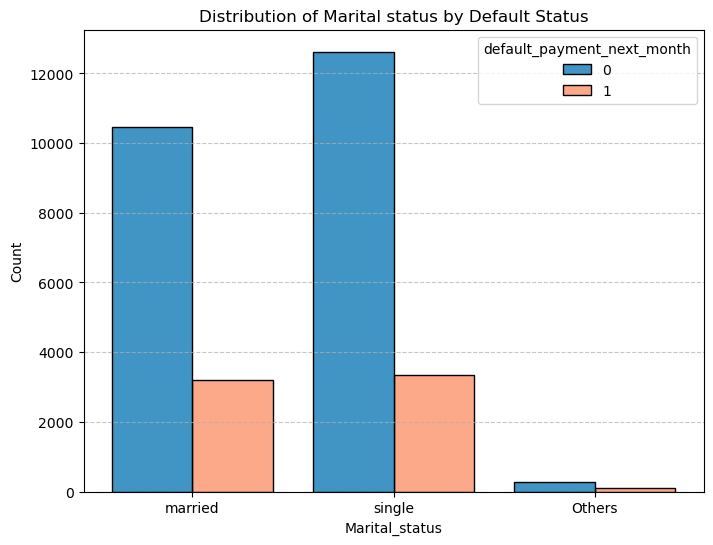

In [47]:
#Create the mapping dictionary for the labels
marital_status_labels = {1: 'married', 2: 'single', 3: 'Others'}

# Define a custom color palette for this specific plot
marital_status_palette = {0: "#0072B2", 1: "#FC8D62"}

fig, ax = plt.subplots(figsize=(8, 6))
plot = sns.histplot(data=df,
                    x=df['MARRIAGE'].replace(marital_status_labels),
                    hue='default_payment_next_month',
                    multiple="dodge",
                    discrete=True,
                    shrink=0.8,
                    palette=marital_status_palette,
                    ax=ax)

# Formatting
title = ax.set_title("Distribution of Marital status by Default Status")
ylabel = ax.set_ylabel('Count')
xlabel = ax.set_xlabel('Marital_status')
grid = plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show Plot
plt.show()

In [48]:
# Compute marital_status category counts along with their proportions
marriage_value_counts = df['MARRIAGE'].value_counts()
singles_counts = marriage_value_counts[2]
married_counts = marriage_value_counts[1]
others_counts = marriage_value_counts[3]
prop_singles = (singles_counts / len(df) * 100).round(2)
prop_married = (married_counts / len(df) * 100).round(2)
prop_others = (others_counts / len(df) * 100).round(2)

# Compute defaulters per marital_status along with their proportions
singles_defaulters = df[df['MARRIAGE'] == 2]['default_payment_next_month'].value_counts()[1]
married_defaulters = df[df['MARRIAGE'] == 1]['default_payment_next_month'].value_counts()[1]
others_defaulters = df[df['MARRIAGE'] == 3]['default_payment_next_month'].value_counts()[1]
prop_singles_defaulters = (singles_defaulters / singles_counts * 100).round(2)
prop_married_defaulters = (married_defaulters / married_counts * 100).round(2)
prop_others_defaulters = (others_defaulters / others_counts * 100).round(2)

# Compute non-defaulters per marital_status along with their proportions
singles_no_defaulters = singles_counts - singles_defaulters
married_no_defaulters = married_counts - married_defaulters
others_no_defaulters = others_counts - others_defaulters
prop_singles_no_defaulters = (singles_no_defaulters / singles_counts * 100).round(2)
prop_married_no_defaulters = (married_no_defaulters / married_counts * 100).round(2)
prop_others_non_defaulters = (others_no_defaulters / others_counts * 100).round(2)

Marital Status and Default Payment Analysis

The dataset consists of customers with different marital statuses. Below, we analyze their distribution and default behavior.
Breakdown of Customers by Marital Status

    Single: 15964 customers (53.21% of total)
    Married: 13659 customers (45.53% of total)
    Others: 377 customers (1.26% of total)

Default Rates by Marital Status

    Single: 3341 defaulters (20.93%)
    Married: 3206 defaulters (23.47%)
    Others: 89 defaulters (23.61%)

Non-Default Rates by Marital Status

    Single: 12623 non-defaulters (79.07%)
    Married: 10453 non-defaulters (76.53%)
    Others: 288 non-defaulters (76.39%)

Key Observations

    The marital status does not appear to have a significant impact on the default rate at first glance. Across all marital status categories, the default rate clusters around 22%, with only minor deviations. However, a statistical test is required to confirm whether these differences are statistically significant or due to random chance.

Evaluating whether there is a statistically significant association between the `MARRIAGE` variable and the default status with a Chi-Square test of independence.

In [49]:
import scipy.stats as stats
import pandas as pd

# Create contingency table
marriage_contingency_table = pd.crosstab(df['MARRIAGE'], df['default_payment_next_month'])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(marriage_contingency_table)

# Display results
print("Contingency Table:\n", marriage_contingency_table)
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"p-Value: {p_value:.2e}")

# Interpretation
if p_value < 0.05:
    print("\nThe relationship between Marital Status and Default Status is **statistically significant** (p < 0.05).")
else:
    print("\nNo significant relationship found between Marital Status and Default Status (p ≥ 0.05).")

Contingency Table:
 default_payment_next_month      0     1
MARRIAGE                               
1                           10453  3206
2                           12623  3341
3                             288    89

Chi-Square Test Results:
Chi-Square Statistic: 28.1303
Degrees of Freedom: 2
p-Value: 7.79e-07

The relationship between Marital Status and Default Status is **statistically significant** (p < 0.05).


The Chi-Square test results indicate that the relationship between Marital Status and Default Status is statistically significant (p-value < 0.05). This suggests that the differences in default rates across marital status categories are unlikely due to random chance.

However, despite the statistical significance, the magnitude of the differences appears small, as the default rates across all marital status levels remain close to the overall dataset proportion (~22%).   
All the above suggest that while marital status may have some influence on default behavior, as a predictor alone may not prove as a strong predictor of default.

#### <a id='toc1_3_3_4_'></a>[`AGE` variable (*The age of the customer*)](#toc0_)

In [50]:
np.sort(df['AGE'].unique())

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 79], dtype=int64)

The age variable was listed as categorical, but as we can see above it takes a lot of distinct integer values making its analysis (e.g. the visualization and interpretation of its distribution) inefficient.   
For this reason, we will attempt to transform it and create three distinct levels as follows:   
1: "Young Adults" (age interval 21-35)   
2: "Middle-Aged Adults" (age interval 36-55)   
3: "Older Adults" (age interval 56+)

In [51]:
# Create a new dataframe to continue working and transforming the 'AGE' variable
df_cleaned = df.copy()

# Define age bins and labels
bins = [20, 35, 55, float('inf')]
labels = [1, 2, 3]  # 1 = Young Adults, 2 = Middle-Aged, 3 = Older Adults

# Apply binning and store in df_cleaned
df_cleaned['AGE_GROUP'] = pd.cut(df_cleaned['AGE'], bins=bins, labels=labels, right=True).astype(int)

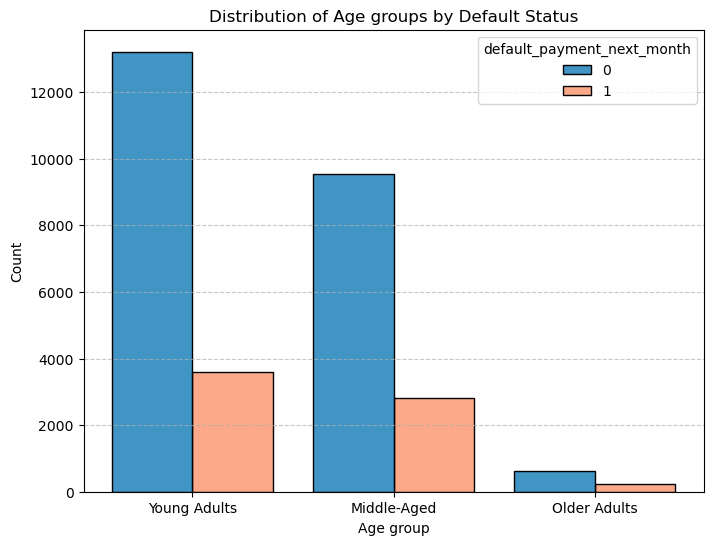

In [52]:
#Create the mapping dictionary for the labels
age_group_labels = {1 : 'Young Adults', 2 : 'Middle-Aged', 3 : 'Older Adults'}

# Define a custom color palette for this specific plot
age_group_palette = {0: "#0072B2", 1: "#FC8D62"}

fig, ax = plt.subplots(figsize=(8, 6))
plot = sns.histplot(data=df_cleaned,
                    x=df_cleaned['AGE_GROUP'].replace(age_group_labels),
                    hue='default_payment_next_month',
                    multiple="dodge",
                    discrete=True,
                    shrink=0.8,
                    palette=age_group_palette,
                    ax=ax)

# Formatting
title = ax.set_title("Distribution of Age groups by Default Status")
ylabel = ax.set_ylabel('Count')
xlabel = ax.set_xlabel('Age group')
grid = plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show Plot
plt.show()

In [53]:
# Compute age groups counts and proportions
age_groups_counts = df_cleaned['AGE_GROUP'].value_counts()
young_adults_count = age_groups_counts[1]
middle_aged_count = age_groups_counts[2]
older_adults_count = age_groups_counts[3]
prop_young_adults = (young_adults_count / len(df_cleaned) * 100).round(2)
prop_middle_aged = (middle_aged_count / len(df_cleaned) * 100).round(2)
prop_older_adults = (older_adults_count / len(df_cleaned) * 100).round(2)

# Compute defaulters per age group along with their proportions
young_adults_defaulters = df_cleaned[df_cleaned['AGE_GROUP'] == 1]['default_payment_next_month'].value_counts()[1]
middle_aged_defaulters = df_cleaned[df_cleaned['AGE_GROUP'] == 2]['default_payment_next_month'].value_counts()[1]
older_adults_defaulters = df_cleaned[df_cleaned['AGE_GROUP'] == 3]['default_payment_next_month'].value_counts()[1]
prop_young_adults_defaulters = (young_adults_defaulters / young_adults_count * 100).round(2)
prop_middle_aged_defaulters = (middle_aged_defaulters / middle_aged_count * 100).round(2)
prop_older_adults_defaulters = (older_adults_defaulters / older_adults_count * 100).round(2)

# Compute non_defaulters per age group along with their proportions
young_adults_non_defaulters = young_adults_count - young_adults_defaulters
middle_aged_non_defaulters = middle_aged_count - middle_aged_defaulters
older_adults_non_defaulters = older_adults_count - older_adults_defaulters
prop_young_adults_non_defaulters = (young_adults_non_defaulters / young_adults_count * 100).round(2)
prop_middle_aged_non_defaulters = (middle_aged_non_defaulters / middle_aged_count * 100).round(2)
prop_older_adults_non_defaulters = (older_adults_non_defaulters / older_adults_count * 100).round(2)

Age Group Analysis and Default Payment Behavior

The modified version of the `AGE` variable categorizes customers into three age groups: **Young Adults (21-35), Middle-Aged Adults (36-55), and Older Adults (56+). ** Below, we examine their distribution and default rates.
Breakdown of Customers by Age Group

    Young Adults: 16809 customers (56.03% of total)
    Middle-Aged Adults: 12347 customers (41.16% of total)
    Older Adults: 844 customers (2.81% of total)

Default Rates by Age Group

    Young Adults: 3597 defaulters (21.4%)
    Middle-Aged Adults: 2815 defaulters (22.8%)
    Older Adults: 224 defaulters (26.54%)

Non-Default Rates by Age Group

    Young Adults: 13212 non-defaulters (78.6%)
    Middle-Aged Adults: 9532 non-defaulters (77.2%)
    Older Adults: 620 non-defaulters (73.46%)

Key Observations

    While visually this is not immediately apparent, the proportion of default rate for older adults appears slightly increased compared to the other age groups as well as to the overall default rate of the dataset but whether this is statisticaly significant or not, needs to be further explored.


Evaluating whether there is a statistically significant relation between the 'AGE_GROUP' variable and the default status with a Chi-Square test of independence.

In [54]:
import scipy.stats as stats
import pandas as pd

# Create contingency table
age_group_contingency_table = pd.crosstab(df_cleaned['AGE_GROUP'], df_cleaned['default_payment_next_month'])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(age_group_contingency_table)

# Display results
print("Contingency Table:\n", age_group_contingency_table)
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"p-Value: {p_value:.4e}")

# Interpretation
if p_value < 0.05:
    print("\nThe relationship between Age Group and Default Status is **statistically significant** (p < 0.05).")
else:
    print("\nNo significant relationship found between Age Group and Default Status (p ≥ 0.05).")

Contingency Table:
 default_payment_next_month      0     1
AGE_GROUP                              
1                           13212  3597
2                            9532  2815
3                             620   224

Chi-Square Test Results:
Chi-Square Statistic: 17.9463
Degrees of Freedom: 2
p-Value: 1.2677e-04

The relationship between Age Group and Default Status is **statistically significant** (p < 0.05).


The Chi-Square test results confirm that the relationship between Age Group and Default Status is statistically significant (p-value < 0.05). This suggests that differences in default rates across age groups are unlikely to be due to random chance.   

While the default rates for young and middle-aged adults remain close to the overall default rate (~22%), older adults (56+) exhibit a notably higher default rate at 26.54%. This suggests that older adults are at a higher risk of default compared to younger customers, and probably the transformed age variable is a relevant factor in default risk.   
Although this hypothesis is justified numerically, we still must note that by accepting it, we insert uncertainty into our analysis, since the sample of `Older Adults` is very small in this specific dataset and may not be representative of the full population.


#### <a id='toc1_3_3_5_'></a>[`Payment status variables` <small>(PAY_SEP, PAY_AUG, ..., PAY_APR)</small> (*The payment (<small>full or partial)</small> or not, made by the customer and for how long is delayed if so*)](#toc0_)

We will start by analyzing the repayment status (`PAY_*` variables) for each month separately. This will help us observe the distribution of repayment behaviors over time and assess how they relate to default rates on a monthly basis.

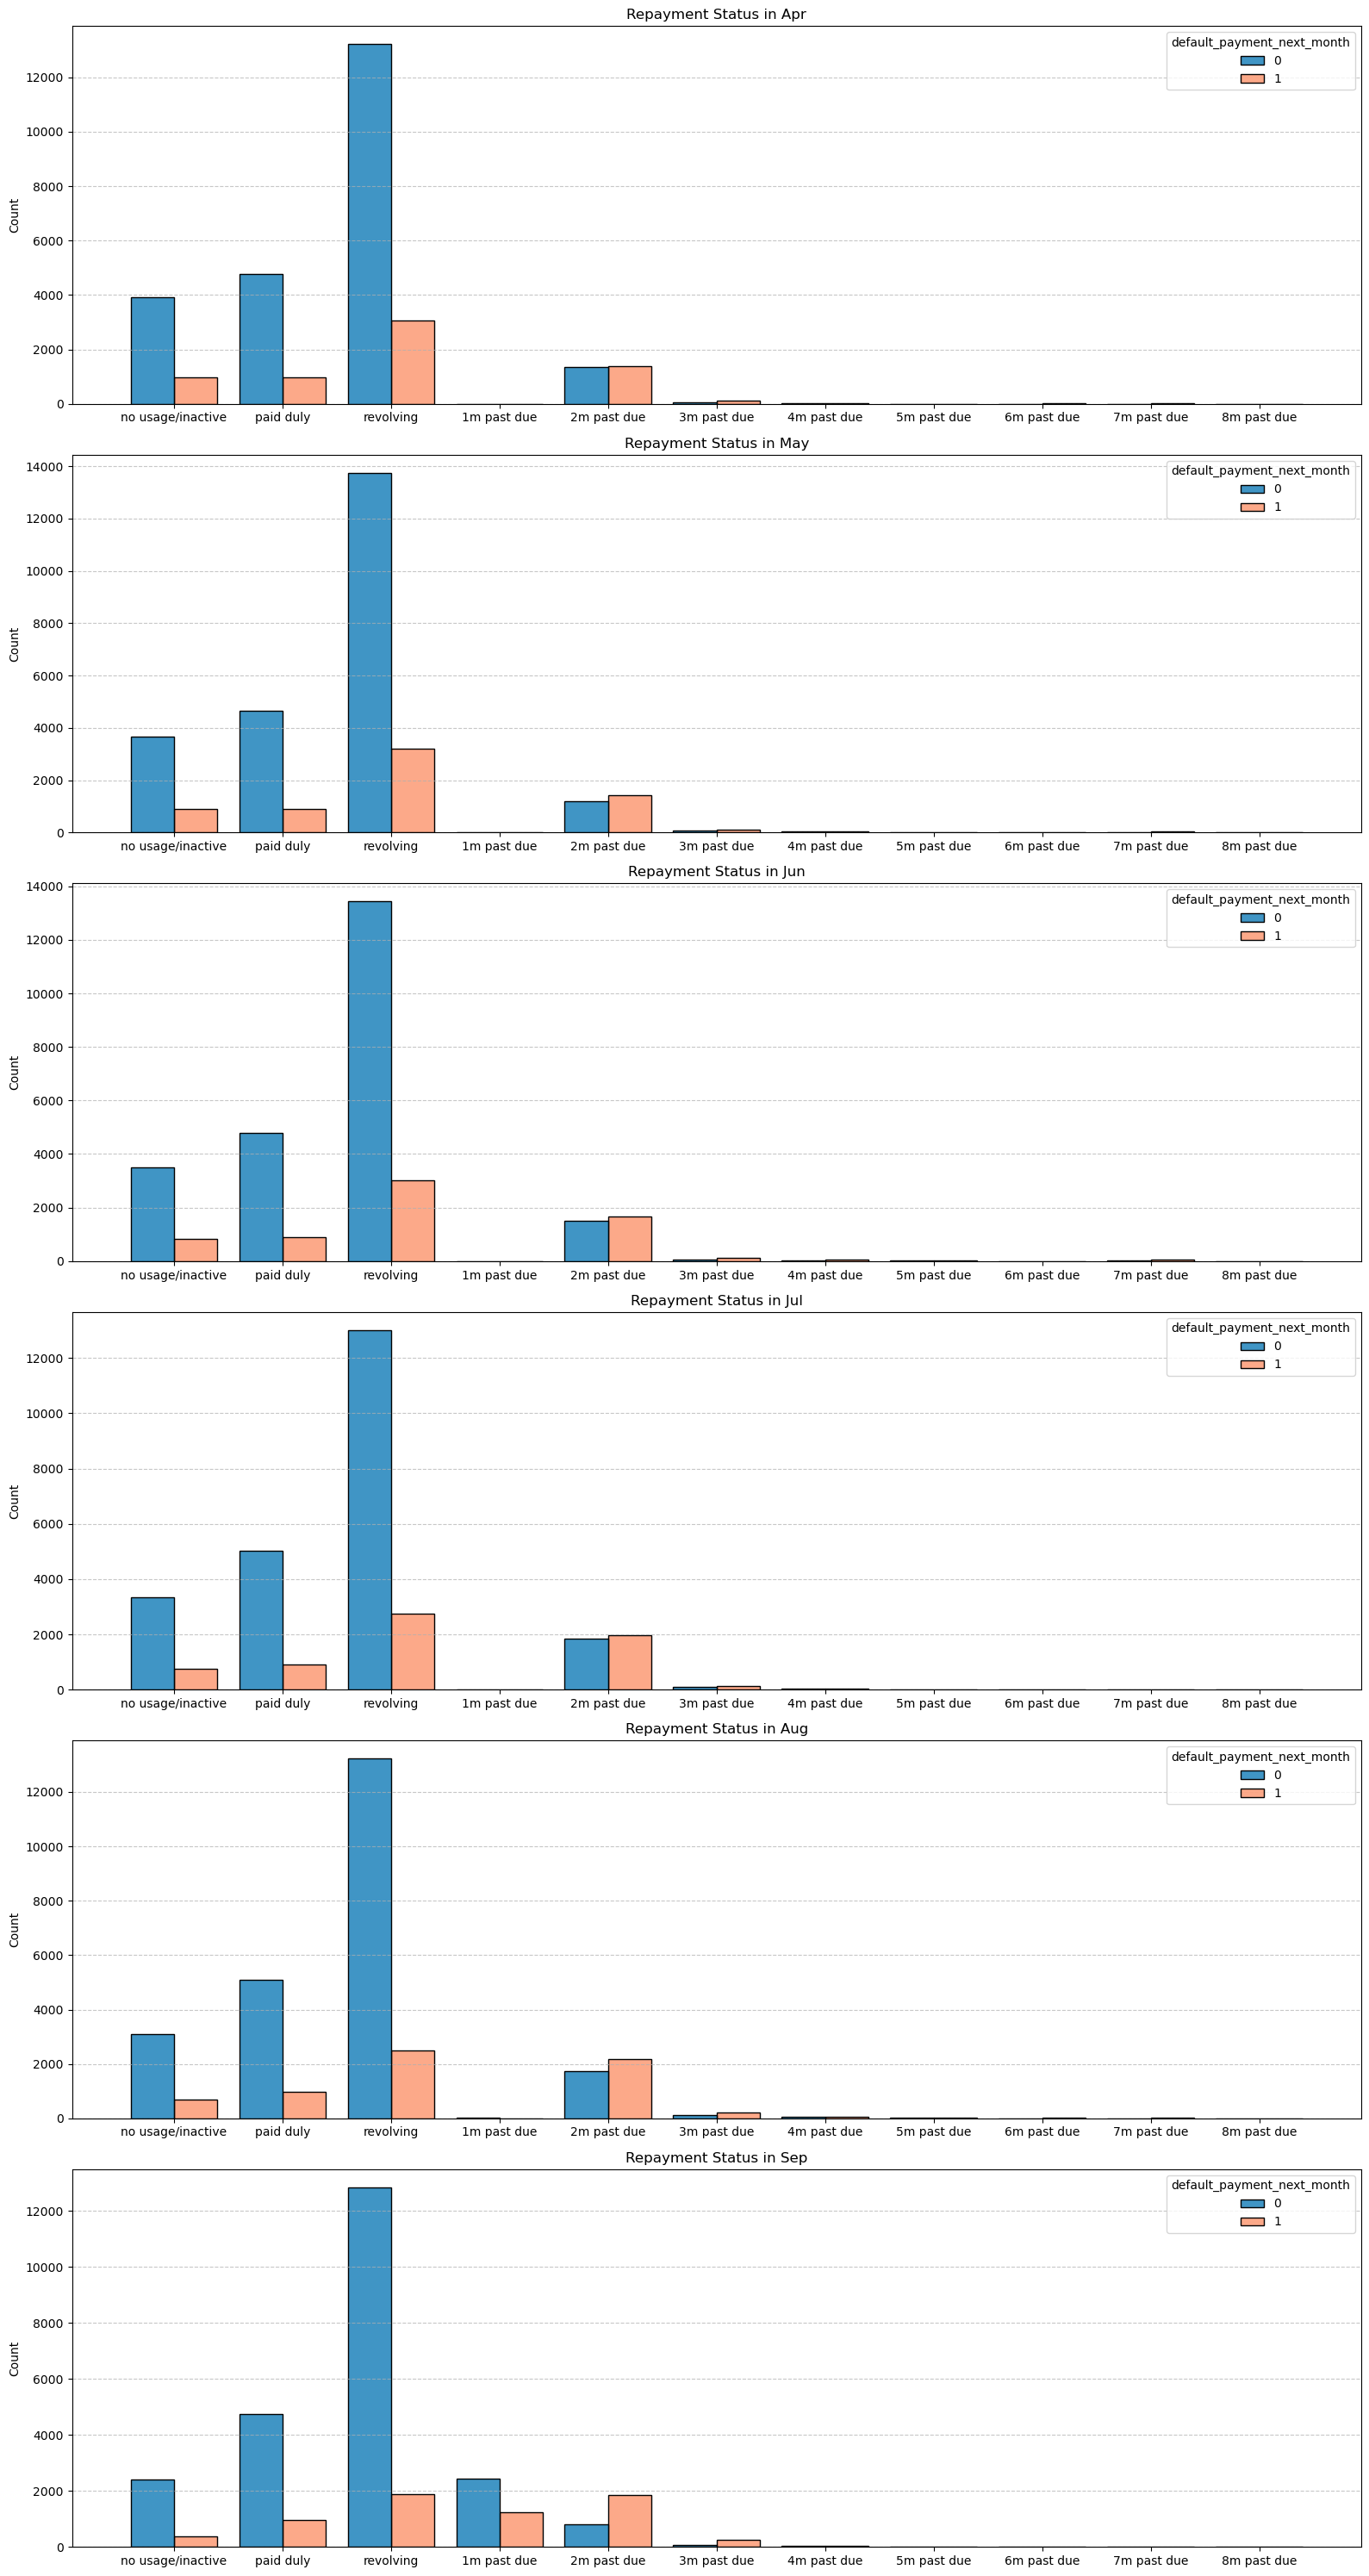

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Predefined mappings
repayment_status_labels = {-2: 'no usage/inactive', -1: 'paid duly', 0: 'revolving',
                           1: '1m past due', 2: '2m past due', 3: '3m past due',
                           4: '4m past due', 5: '5m past due', 6: '6m past due',
                           7: '7m past due', 8: '8m past due'}

repayment_status_palette = {0: "#0072B2", 1: "#FC8D62"}

pay_columns = ['PAY_APR', 'PAY_MAY', 'PAY_JUN', 'PAY_JUL', 'PAY_AUG', 'PAY_SEP']

fig, axes = plt.subplots(6, 1, figsize=(16, 30)) 
axes = axes.flatten()  

for idx, col in enumerate(pay_columns):
    ax = axes[idx]

    sns.histplot(
        data=df,
        x=pd.Categorical(
            df[col].replace(repayment_status_labels),
            categories=repayment_status_labels.values(),
            ordered=True),
        hue='default_payment_next_month',
        multiple="dodge",
        discrete=True,
        shrink=0.8,
        palette=repayment_status_palette,
        ax=ax
    )

    title = ax.set_title(f"Repayment Status in {col.replace('PAY_', '').title()}")
    ax.grid(axis='y', linestyle='--', alpha=0.7) 


plt.tight_layout()  # Prevent overlapping
plt.show();

After visualizing the repayment status trends separately for each month, we observe that May and June show similar patterns to April, with relatively stable credit card usage and delinquency levels. However, as we move into the summer months of July and August, there is a notable increase in credit card usage, including customers who had previously shown no activity.

This shift led to a decline in duly paid accounts and, consequently, a visible increase in delinquencies of one month or more in September. The rise in delinquencies is likely tied to the continued use of revolving credit, which remained consistently above 12,000 NT Dollars throughout the entire recorded period (April–September). This persistent revolving credit usage may have contributed to accumulating interest, further inflating customers' bill amounts and increasing the likelihood of missed payments.

While the repayment status directly reflects a customer’s payment behavior and expect it to have a strong association with the default status, conducting a statistical test is essential for the confirmation of our initial assumption.

In [57]:
import scipy.stats as stats
import pandas as pd

pay_columns = ['PAY_APR', 'PAY_MAY', 'PAY_JUN', 'PAY_JUL', 'PAY_AUG', 'PAY_SEP']

# Run Chi-Square test for each PAY_* variable
for pay_var in pay_columns:
    payment_status_contingency_table = pd.crosstab(df[pay_var], df['default_payment_next_month'])
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(payment_status_contingency_table)

    print(f"\nChi-Square Test for {pay_var}:")
    print(f"Chi-Square Statistic: {chi2_stat:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"p-Value: {p_value:.4e}")

    if p_value < 0.05:
        print(f"The relationship between {pay_var} and Default Status is **statistically significant** (p < 0.05).")
    else:
        print(f"No significant relationship found for {pay_var} (p ≥ 0.05).")


Chi-Square Test for PAY_APR:
Chi-Square Statistic: 1886.8353
Degrees of Freedom: 9
p-Value: 0.0000e+00
The relationship between PAY_APR and Default Status is **statistically significant** (p < 0.05).

Chi-Square Test for PAY_MAY:
Chi-Square Statistic: 2197.6949
Degrees of Freedom: 9
p-Value: 0.0000e+00
The relationship between PAY_MAY and Default Status is **statistically significant** (p < 0.05).

Chi-Square Test for PAY_JUN:
Chi-Square Statistic: 2341.4699
Degrees of Freedom: 10
p-Value: 0.0000e+00
The relationship between PAY_JUN and Default Status is **statistically significant** (p < 0.05).

Chi-Square Test for PAY_JUL:
Chi-Square Statistic: 2622.4621
Degrees of Freedom: 10
p-Value: 0.0000e+00
The relationship between PAY_JUL and Default Status is **statistically significant** (p < 0.05).

Chi-Square Test for PAY_AUG:
Chi-Square Statistic: 3474.4668
Degrees of Freedom: 10
p-Value: 0.0000e+00
The relationship between PAY_AUG and Default Status is **statistically significant** (p <

As anticipated, the repayment status variables (`PAY_*`) demonstrate a highly significant relationship with default status across all months (p < 0.05 in all cases). This suggests that repayment behavior plays a crucial role in determining the likelihood of default, with recent months exhibiting even stronger associations since the chi-squared statistic in the last month of the observed period (September) is almost 4 times bigger than in April and double from the months of May, June and July.   
These findings confirm that `PAY_*` variables will be critical predictors in any modeling efforts aimed at predicting credit default and the repayment behavior in the most recent month has the strongest association with default.   
This suggests that recent missed payments are the most critical warning signals for default risk, reinforcing the need to give more weight to recent repayment history in predictive modeling.

One last interesting and important thing we should do, is to observe how the proportion of defaulters vs non-defaulters changes with respect to their payment behavior.   
To explore this, we filter the dataset for customers who had a payment delay of 3 months or more in the months of September and August

In [58]:
payment_status = ['PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
df[df['PAY_AUG'] >= 3]['default_payment_next_month'].value_counts()
df[df['PAY_SEP'] >= 3]['default_payment_next_month'].value_counts()

default_payment_next_month
1    287
0    196
Name: count, dtype: int64

default_payment_next_month
1    333
0    130
Name: count, dtype: int64

Although the size of the resulting samples in both cases is very small (few customers exhibited this particular behavior) the proportion of defaulters in both subsets jumped from 22% in the original unfiltered dataset, to 59% and 72% respectively, further justifying our initial intuition that as payment delays increase over time, the likelihood of defaulting also rises sharply.   
This insight can be strategically leveraged during a Feature Engineering phase to enhance model performance and optimize predictive accuracy.

Although all categorical variables were found to be statistically dependent on the target variable using the chi-squared test, their individual predictive contributions can only be properly assessed through predictive modeling and evaluation.

### <a id='toc1_3_4_'></a>[EDA on the **Numerical** predictors](#toc0_)

#### <a id='toc1_3_4_1_'></a>[`BILL_AMT_` variables (*The Bill amount due of the credit card*)](#toc0_)



We shall plot the distribution for the Bill amount variables and observe if there is any significant deviation in a particular month and if its behavior alters significantly with respect to the default status of the customers.

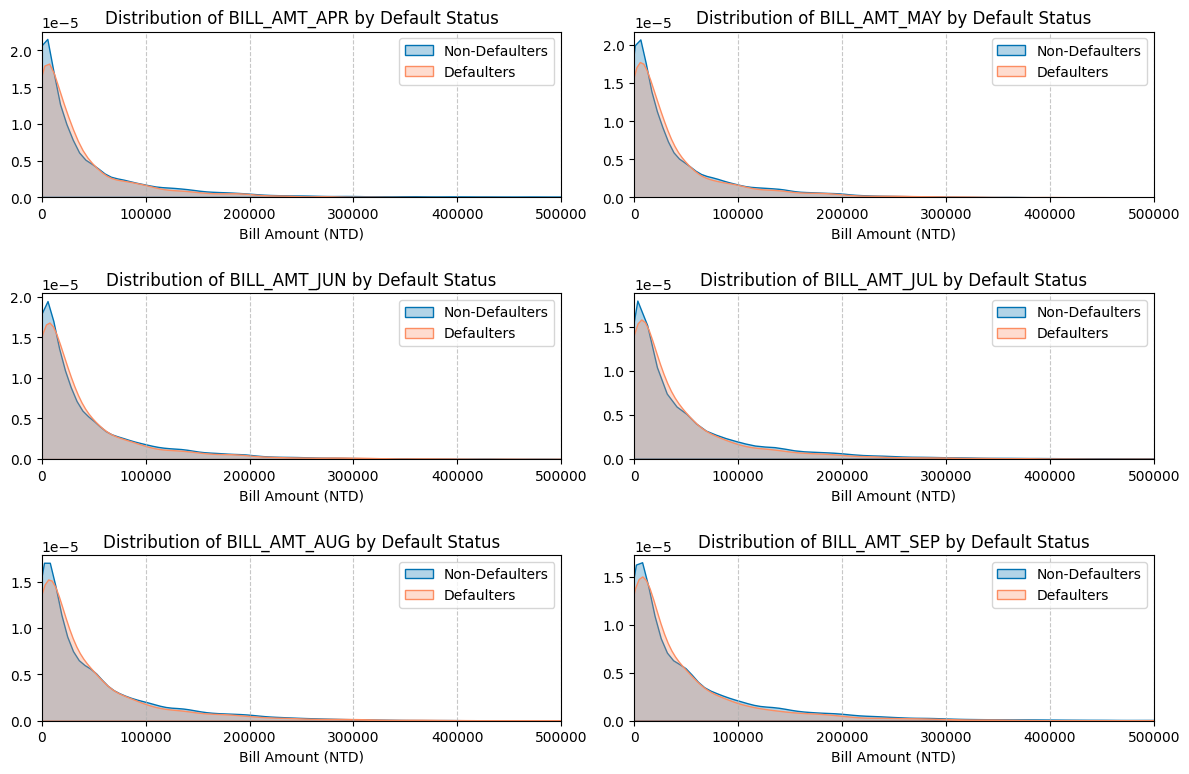

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define BILL_AMT columns
bill_amount_vars = ['BILL_AMT_APR', 'BILL_AMT_MAY', 'BILL_AMT_JUN',
                    'BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEP']

# Set figure size
figure = plt.figure(figsize=(12, 8))

# Loop through each BILL_AMT variable and plot KDE plots
for i, col in enumerate(bill_amount_vars):
    subplots = plt.subplot(3, 2, i + 1)
    plot_1 = sns.kdeplot(df.loc[df['default_payment_next_month'] == 0, col], fill=True, label='Non-Defaulters', color="#0072B2", alpha=0.3)
    plot_2 = sns.kdeplot(df.loc[df['default_payment_next_month'] == 1, col], fill=True, label='Defaulters', color="#FC8D62", alpha=0.3)

    # Formatting
    title = plt.title(f"Distribution of {col} by Default Status", fontsize=12)
    xlabel =plt.xlabel("Bill Amount (NTD)", fontsize=10)
    ylabel = plt.ylabel("")
    xlim = plt.xlim(0, 500000)  # Adjust x-axis range for better visualization
    legend = plt.legend()
    grid = plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

From the above plot, we observe that the distribution of Bill Amounts remains relatively stable across all months, with no major trend over time. However, in August and September, more customers appear to carry higher bill amounts, which was previously noted in earlier steps of the analysis. One possible explanation for this seasonal effect could be increased spending due to vacations, or back-to-school expenses.

Regarding the default status, the distribution of bill amounts for defaulters and non-defaulters overlaps significantly, indicating that bill amount alone is not a strong predictor of default risk. Across all months and for both groups, the distribution remains heavily right skewed, meaning most customers maintain relatively low bill balances, while a smaller group carries significantly higher balances. Notably, high bill amounts do not appear to be associated with higher default risk, as both defaulters and non-defaulters are spread similarly across different bill amounts.

In conclusion, Bill Amount variable alone do not provide a strong predictive signal for default status. However, they may still contribute meaningfully to default prediction when considered in combination with other factors, such as payment amounts, repayment history, or revolving credit usage and this can be explored further during a Feature Engineering phase.

As previously observed, the distributions of all Bill Amount variables across the months exhibit heavy right-skewness. Given this distributional characteristic, these variables cannot be approximated by a Gaussian distribution.

To statistically evaluate whether Bill Amount differs significantly between defaulters and non-defaulters, we will apply two non-parametric tests:
- Mann-Whitney U Test – To assess whether there is a significant difference in the median bill amounts between the two groups   

- Kolmogorov-Smirnov (KS) Test – To compare the overall distributions and determine if they differ significantly.

These tests will help us quantify any emerging patterns with respect to default status, beyond the insights gained from the visual analysis.

[Read more about Mann–Whitney U test here](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)   

[Read more about Kolmogorov-Smirnov (KS) test here](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)

In [61]:
import scipy.stats as stats
import numpy as np
import pandas as pd

# Define the BILL_AMT columns
bill_amount_vars = ['BILL_AMT_APR', 'BILL_AMT_MAY', 'BILL_AMT_JUN',
                    'BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEP']

# Split data into defaulters and non-defaulters
df_defaulters = df[df['default_payment_next_month'] == 1]
df_non_defaulters = df[df['default_payment_next_month'] == 0]

# Iterate over each BILL_AMT variable
for col in bill_amount_vars:
    # Mann-Whitney U Test
    u_stat, p_u = stats.mannwhitneyu(df_non_defaulters[col], df_defaulters[col], alternative='two-sided')

    # Kolmogorov-Smirnov Test
    ks_stat, p_ks = stats.ks_2samp(df_non_defaulters[col], df_defaulters[col])

    # Print results
    print(f"\nStatistical Tests for {col}:")
    print(f"  - Mann-Whitney U Test: U-Statistic = {u_stat:.4f}, p-Value = {p_u:.4e}")
    print(f"  - Kolmogorov-Smirnov Test: KS-Statistic = {ks_stat:.4f}, p-Value = {p_ks:.4e}")

    # Interpretation
    if p_u < 0.05:
        print(f"  --> Significant difference in bill amounts for {col} between the two target classes (Mann-Whitney U Test, p < 0.05)")
    if p_ks < 0.05:
        print(f"  --> Significant difference in bill amount distribution for {col} between the two target classes (KS Test, p < 0.05)")


Statistical Tests for BILL_AMT_APR:
  - Mann-Whitney U Test: U-Statistic = 77529951.0000, p-Value = 9.8948e-01
  - Kolmogorov-Smirnov Test: KS-Statistic = 0.0293, p-Value = 2.8248e-04
  --> Significant difference in bill amount distribution for BILL_AMT_APR between the two target classes (KS Test, p < 0.05)

Statistical Tests for BILL_AMT_MAY:
  - Mann-Whitney U Test: U-Statistic = 78259960.0000, p-Value = 2.3537e-01
  - Kolmogorov-Smirnov Test: KS-Statistic = 0.0267, p-Value = 1.2597e-03
  --> Significant difference in bill amount distribution for BILL_AMT_MAY between the two target classes (KS Test, p < 0.05)

Statistical Tests for BILL_AMT_JUN:
  - Mann-Whitney U Test: U-Statistic = 78422386.5000, p-Value = 1.4777e-01
  - Kolmogorov-Smirnov Test: KS-Statistic = 0.0231, p-Value = 7.8162e-03
  --> Significant difference in bill amount distribution for BILL_AMT_JUN between the two target classes (KS Test, p < 0.05)

Statistical Tests for BILL_AMT_JUL:
  - Mann-Whitney U Test: U-Statis

The Kolmogorov-Smirnov (KS) test shows significant differences in the distribution of bill amounts between defaulters and non-defaulters across all months (p < 0.05). This indicates that while the two groups overlap, their overall distributions differ.

The Mann-Whitney U test, which compares medians, finds no significant differences in earlier months (April–June). However, in July–September, defaulters and non-defaulters exhibit statistically distinct median bill amounts, with the strongest effect in September (p = 1.15e-05).
The key takeaways from the above tests are the following:   

- Bill amounts alone are not strong predictors of default, as their distributions heavily overlap.   

- Recent months (July–September) show stronger statistical differences, suggesting that recent transactional behavior is more relevant for assessing default risk.   

- The September bill amount has the strongest association, reinforcing the idea that recent financial distress is a critical warning signal.

While bill amounts alone appear to be not highly predictive, recent trends—especially in September—may provide valuable insights especially when combined with other predictors.

#### <a id='toc1_3_4_2_'></a>[`PAY_AMT` variables (*The amount of payment by the customer*)](#toc0_)

Plotting the distribution for the Payment amount variables and observe if there is any significant deviation in a particular month and if its behavior alters significantly with respect to the default status of the customers.

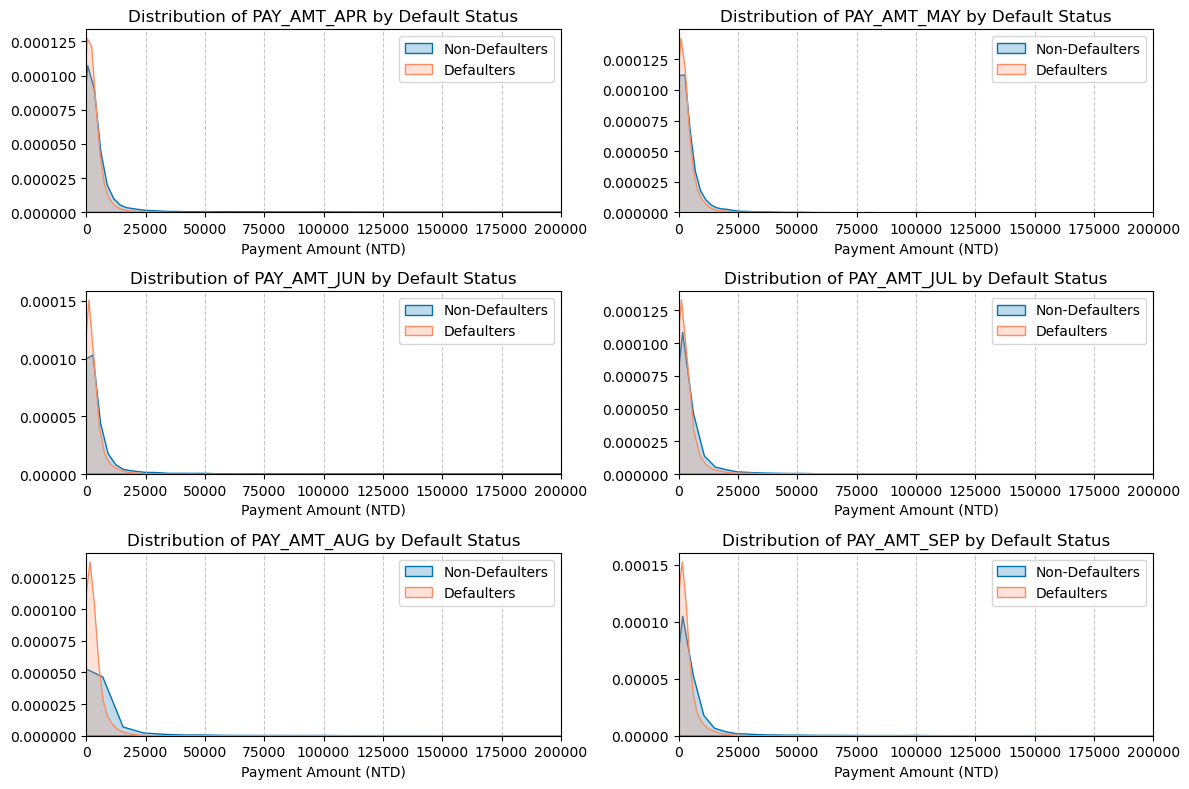

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define PAY_AMT columns
pay_amount_vars = ['PAY_AMT_APR', 'PAY_AMT_MAY', 'PAY_AMT_JUN',
                   'PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEP']

# Set figure size
figure = plt.figure(figsize=(12, 8))

# Loop through each PAY_AMT variable and plot KDE plots
for i, col in enumerate(pay_amount_vars):
    subplots = plt.subplot(3, 2, i + 1)
    plot_1 = sns.kdeplot(df.loc[df['default_payment_next_month'] == 0, col], fill=True, label='Non-Defaulters', color="#0072B2")
    plot_2 = sns.kdeplot(df.loc[df['default_payment_next_month'] == 1, col], fill=True, label='Defaulters', color="#FC8D62")

    # Formatting
    title = plt.title(f"Distribution of {col} by Default Status", fontsize=12)
    xlabel = plt.xlabel("Payment Amount (NTD)", fontsize=10)
    ylabel = plt.ylabel("")
    xlim = plt.xlim(0, 200000)  # Adjust x-axis range for better visualization
    legend = plt.legend()
    grid = plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show();

From the above plot, we observe that the distribution of payment amounts remains relatively stable across all months. However, with respect to the default status a pattern emerges in terms of the magnitude of payments.

Non-defaulters consistently make larger payments compared to defaulters, and this effect becomes more pronounced in August and September, aligning with the previously observed increase in bill amounts during these months.

Regarding the default status, while both groups exhibit a right-skewed distribution, meaning most customers make relatively small payments, the distribution for non-defaulters extends further to higher values. This suggests that non-defaulters are more likely to make substantial payments, potentially covering their debts more effectively, whereas defaulters tend to have lower payment amounts across all months, struggling to repay their debt.

In conclusion, payment amounts can serve as a strong predictor for the default status of a customer. This insight can be further explored during the Feature Engineering phase, potentially by analyzing payment-to-bill ratios or identifying thresholds of insufficient payments that may lead to default.

Next, we conduct the statistical tests needed to evaluate and quantify whether the behavior of the variables differs significantly from one class (defaulters) to the other (non-defaulters).

In [64]:
import scipy.stats as stats
import numpy as np
import pandas as pd

# Define the PAY_AMT columns
pay_amount_vars = ['PAY_AMT_APR', 'PAY_AMT_MAY', 'PAY_AMT_JUN',
                   'PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEP']

# Split data into defaulters and non-defaulters
df_defaulters = df[df['default_payment_next_month'] == 1]
df_non_defaulters = df[df['default_payment_next_month'] == 0]

# Iterate over each PAY_AMT variable
for col in pay_amount_vars:
    # Mann-Whitney U Test
    u_stat, p_u = stats.mannwhitneyu(df_non_defaulters[col], df_defaulters[col], alternative='two-sided')

    # Kolmogorov-Smirnov Test
    ks_stat, p_ks = stats.ks_2samp(df_non_defaulters[col], df_defaulters[col])

    # Print results
    print(f"\nStatistical Tests for {col}:")
    print(f"  - Mann-Whitney U Test: U-Statistic = {u_stat:.4f}, p-Value = {p_u:.4e}")
    print(f"  - Kolmogorov-Smirnov Test: KS-Statistic = {ks_stat:.4f}, p-Value = {p_ks:.4e}")

    # Interpretation
    if p_u < 0.05:
        print(f"  --> Significant difference in payment amounts for {col} between the two target classes (Mann-Whitney U Test, p < 0.05)")
    if p_ks < 0.05:
        print(f"  --> Significant difference in payment amount distribution for {col} between the two target classes (KS Test, p < 0.05)")


Statistical Tests for PAY_AMT_APR:
  - Mann-Whitney U Test: U-Statistic = 90526299.0000, p-Value = 3.1841e-98
  - Kolmogorov-Smirnov Test: KS-Statistic = 0.1259, p-Value = 7.5573e-72
  --> Significant difference in payment amounts for PAY_AMT_APR between the two target classes (Mann-Whitney U Test, p < 0.05)
  --> Significant difference in payment amount distribution for PAY_AMT_APR between the two target classes (KS Test, p < 0.05)

Statistical Tests for PAY_AMT_MAY:
  - Mann-Whitney U Test: U-Statistic = 90022048.0000, p-Value = 1.1249e-90
  - Kolmogorov-Smirnov Test: KS-Statistic = 0.1207, p-Value = 4.3571e-66
  --> Significant difference in payment amounts for PAY_AMT_MAY between the two target classes (Mann-Whitney U Test, p < 0.05)
  --> Significant difference in payment amount distribution for PAY_AMT_MAY between the two target classes (KS Test, p < 0.05)

Statistical Tests for PAY_AMT_JUN:
  - Mann-Whitney U Test: U-Statistic = 91253295.5000, p-Value = 7.2847e-109
  - Kolmogor

As expected, payment amounts (`PAY_AMT_*`) show a highly significant relationship with default status across all months. Both the Mann-Whitney U test and Kolmogorov-Smirnov test confirm substantial differences in both the central tendency and distribution of payment amounts between defaulters and non-defaulters (p < 0.05 in all cases).

Key observations:   

- Stronger statistical significance in recent months: The effect size (U-statistic and KS-statistic) increases from April to September, indicating that payment behavior in more recent months is even more strongly associated with default risk.   

- Largest difference observed in September (`PAY_AMT_SEP`): This suggests that the most recent payment amount is a critical indicator of a customer’s likelihood to default.   

- Progressive increase in KS-statistic: The rising KS-statistic values across months suggest that the divergence between defaulters and non-defaulters in payment distributions becomes more pronounced closer to the default event.

The results reinforce the importance of recent payment amounts as strong predictors of credit default. These variables will likely play a crucial role in ML modeling, and their predictive power may be further enhanced through feature engineering techniques, such as weighted aggregation, to better capture their dynamic impact over time.

#### <a id='toc1_3_4_3_'></a>[`LIMIT BAL` variable (*The credit limit approved from the bank*)](#toc0_)

<Figure size 800x600 with 0 Axes>

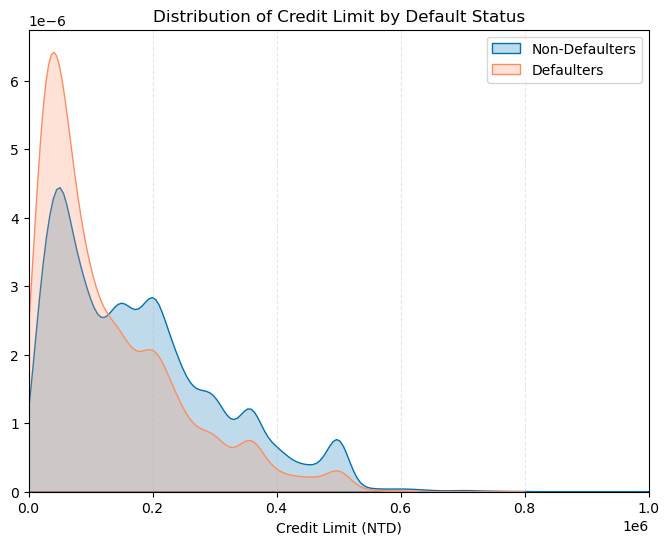

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(8, 6))

# KDE plot for LIMIT_BAL by Default Status
plot_1 = sns.kdeplot(df.loc[df['default_payment_next_month'] == 0, 'LIMIT_BAL'],
                      fill=True, label='Non-Defaulters', color="#0072B2")
plot_2 = sns.kdeplot(df.loc[df['default_payment_next_month'] == 1, 'LIMIT_BAL'],
                      fill=True, label='Defaulters', color="#FC8D62")

# Formatting
title = plt.title("Distribution of Credit Limit by Default Status", fontsize=12)
xlabel = plt.xlabel("Credit Limit (NTD)", fontsize=10)
ylabel = plt.ylabel("")
xlim = plt.xlim(0, 1000000)  # Adjust x-axis range for better visualization
legend = plt.legend()
grid = plt.grid(axis='x', linestyle='--', alpha=0.3)

# Show plot
plt.show()

From the above plot, we observe that the distribution of credit limits varies between defaulters and non-defaulters. While defaulters are more concentrated in lower credit limits, non-defaulters appear more spread out across mid to high credit limits. This suggests that individuals with higher credit limits do not necessarily default on their payments.

While there is a visible trend where lower credit limits are associated with a higher proportion of defaulters, further analysis is needed to determine the strength of this relationship in predicting default risk.

Performing statistical tests to assess whether the approved credit limit (LIMIT_BAL) differs significantly between defaulters and non-defaulters and quantify its potential impact on credit default.

In [66]:
import scipy.stats as stats

# Split data into defaulters and non-defaulters
df_defaulters = df[df['default_payment_next_month'] == 1]['LIMIT_BAL']
df_non_defaulters = df[df['default_payment_next_month'] == 0]['LIMIT_BAL']

# Mann-Whitney U Test
u_stat, p_u = stats.mannwhitneyu(df_non_defaulters, df_defaulters, alternative='two-sided')

# Kolmogorov-Smirnov Test
ks_stat, p_ks = stats.ks_2samp(df_non_defaulters, df_defaulters)

# Print results
print("\nStatistical Tests for LIMIT_BAL:")
print(f"  - Mann-Whitney U Test: U-Statistic = {u_stat:.4f}, p-Value = {p_u:.4e}")
print(f"  - Kolmogorov-Smirnov Test: KS-Statistic = {ks_stat:.4f}, p-Value = {p_ks:.4e}")

# Interpretation
if p_u < 0.05:
    print(f"  --> Significant difference in credit limit between defaulters and non-defaulters (Mann-Whitney U Test, p < 0.05)")
if p_ks < 0.05:
    print(f"  --> Significant difference in the distribution of credit limits between defaulters and non-defaulters (KS Test, p < 0.05)")


Statistical Tests for LIMIT_BAL:
  - Mann-Whitney U Test: U-Statistic = 95786286.5000, p-Value = 1.2255e-189
  - Kolmogorov-Smirnov Test: KS-Statistic = 0.1819, p-Value = 4.8965e-150
  --> Significant difference in credit limit between defaulters and non-defaulters (Mann-Whitney U Test, p < 0.05)
  --> Significant difference in the distribution of credit limits between defaulters and non-defaulters (KS Test, p < 0.05)


The statistical tests confirm that credit limit (`LIMIT_BAL` variable) differs significantly between defaulters and non-defaulters. Both the Mann-Whitney U test (p < 0.05) and Kolmogorov-Smirnov test (p < 0.05) indicate strong differences in both the median and distribution of credit limits across the two groups.
Key Takeaways:   

- Lower credit limits are associated with a higher proportion of defaulters, suggesting that increased borrowing power does not necessarily lead to worse repayment behavior.     

- The strong statistical significance (p ≈ 0) reinforces its importance as a potential predictor for credit risk modeling.   


**A probable cause for this can be an aggresive promotion policy that led the bank to approve credit limits in clients that otherwise would be rejected. Clients with worse financial data force the bank to initialy approve/issue lower credit limits, but eventually this policy did not help in preventing a *`bad`* client to default.**   

In conclusion, `LIMIT_BAL` should be considered in predictive modeling, possibly in interaction with other variables such as repayment history and bill amounts, to better capture its effect on default risk.

#### <a id='toc1_3_4_4_'></a>[Visualizing Trends over time](#toc0_)

In the previous sections, we identified an emerging trend over time for the Bill Amount and Payment Amount variables. Our statistical analysis also confirmed that Payment Amount has a stronger impact on predicting credit default compared to Bill Amount.

To further explore these patterns and gain a clearer intuition about their relationship with default status, we will visualize the trends using line plots. Specifically, we will plot the mean values of these variables over the recorded time period, separately for defaulters and non-defaulters.

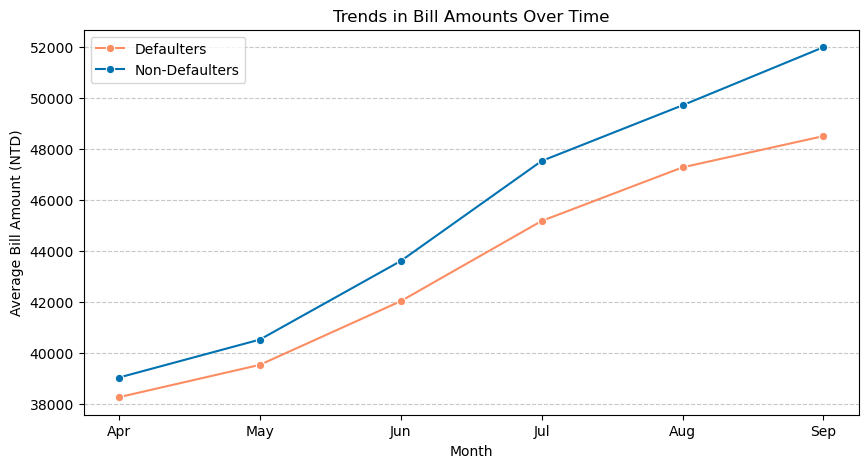

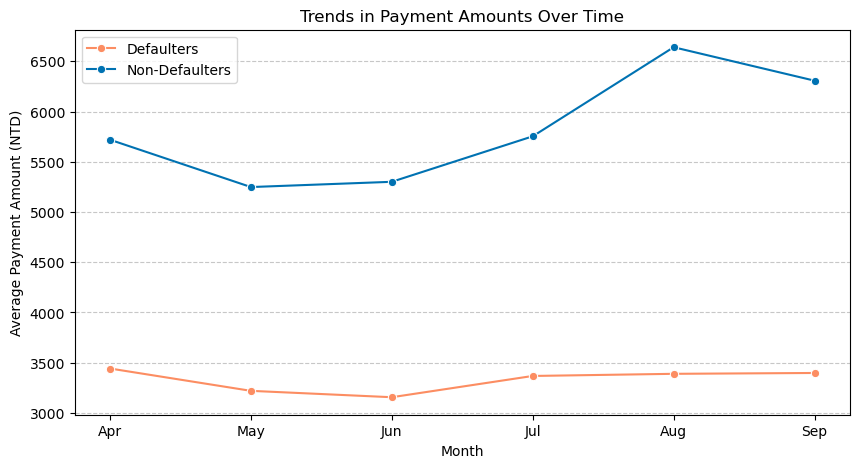

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define BILL_AMT and PAY_AMT columns
bill_amount_vars = ['BILL_AMT_APR', 'BILL_AMT_MAY', 'BILL_AMT_JUN',
                    'BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEP']
pay_amount_vars = ['PAY_AMT_APR', 'PAY_AMT_MAY', 'PAY_AMT_JUN',
                   'PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEP']

# Create a mapping for months
month_labels = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

# Compute the mean values over time for each target class
bill_amounts_defaulters = df[df['default_payment_next_month'] == 1][bill_amount_vars].mean()
bill_amounts_non_defaulters = df[df['default_payment_next_month'] == 0][bill_amount_vars].mean()

pay_amounts_defaulters = df[df['default_payment_next_month'] == 1][pay_amount_vars].mean()
pay_amounts_non_defaulters = df[df['default_payment_next_month'] == 0][pay_amount_vars].mean()

# Convert to DataFrame for easier plotting
bill_trends = pd.DataFrame({
    'Month': month_labels,
    'Defaulters': bill_amounts_defaulters.values,
    'Non-Defaulters': bill_amounts_non_defaulters.values
})

pay_trends = pd.DataFrame({
    'Month': month_labels,
    'Defaulters': pay_amounts_defaulters.values,
    'Non-Defaulters': pay_amounts_non_defaulters.values
})

# Plot Trends for Bill Amounts
figure1 = plt.figure(figsize=(10, 5))
bill_lineplot1 = sns.lineplot(data=bill_trends, x='Month', y='Defaulters', marker='o', label="Defaulters", color='#FC8D62')
bill_lineplot2 = sns.lineplot(data=bill_trends, x='Month', y='Non-Defaulters', marker='o', label="Non-Defaulters", color='#0072B2')
title1 = plt.title("Trends in Bill Amounts Over Time")
ylabel1 = plt.ylabel("Average Bill Amount (NTD)")
grid1 = plt.grid(axis='y', linestyle='--', alpha=0.7)
legend1 = plt.legend()
plt.show();

# Plot Trends for Payment Amounts
figure2 = plt.figure(figsize=(10, 5))
pay_lineplot1 = sns.lineplot(data=pay_trends, x='Month', y='Defaulters', marker='o', label="Defaulters", color='#FC8D62')
pay_lineplot2 = sns.lineplot(data=pay_trends, x='Month', y='Non-Defaulters', marker='o', label="Non-Defaulters", color='#0072B2')
title2 = plt.title("Trends in Payment Amounts Over Time")
ylabel2 = plt.ylabel("Average Payment Amount (NTD)")
grid2 = plt.grid(axis='y', linestyle='--', alpha=0.7)
legend2 = plt.legend()
plt.show();

The trends in average bill amounts show only minor differences between defaulters and non-defaulters, with both groups exhibiting a similar upward trajectory.   
Non-defaulters tend to utilize their credit cards slightly more, particularly in August and September, leading to higher bill amounts during these months.

In contrast, the pattern in payment amounts is much more pronounced.   
Non-defaulters consistently make significantly higher payments, whereas defaulters maintain a stable but considerably lower payment level, likely reflecting difficulties in repaying their debt. This reinforces the idea that payment behavior is a critical indicator of financial distress and potential default risk.

### <a id='toc1_3_5_'></a>[Identifying outliers in the dataset](#toc0_)

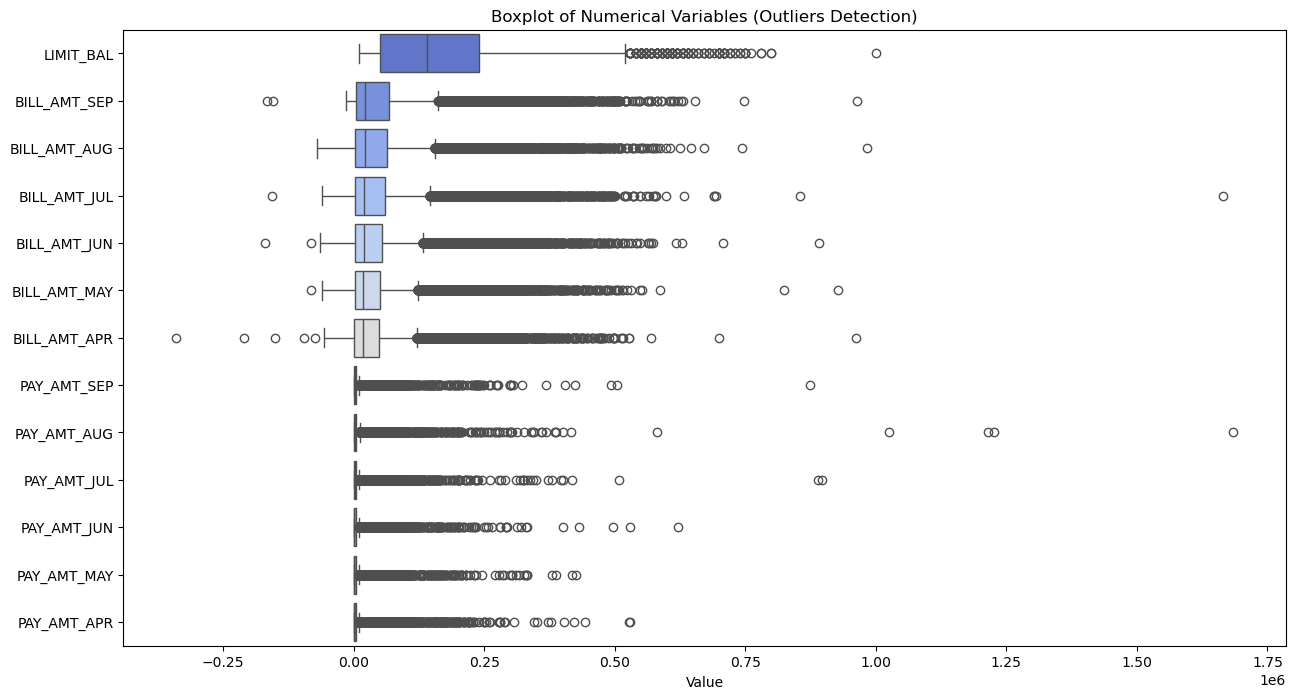

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical variables
numerical_vars = ['LIMIT_BAL', 'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
                   'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
                   'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
                   'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

# Boxplots to visualize outliers
figure = plt.figure(figsize=(15, 8))
plot = sns.boxplot(data=df[numerical_vars], orient='h', palette="coolwarm")
title = plt.title("Boxplot of Numerical Variables (Outliers Detection)")
xlabel = plt.xlabel("Value")
plt.show()

At first glance, the above box plots may seem overwhelming due to the large number of outliers. However, this was fully anticipated, as we previously observed that the distributions of Bill Amount and Payment Amount variables exhibit heavy right skewness (these correspond to values lying under the long right tail of the distribution).

Given that this dataset originates from the bank’s records, we accept the risk of assuming that all data points, including extreme values, are valid real-world observations rather than anomalies or errors. Therefore, in the Data Preprocessing phase, we will retain all outliers as genuine records without applying any removal or imputation technique.

### <a id='toc1_3_6_'></a>[Checking for missing values in the dataset](#toc0_)

In [70]:
df.isna().sum()

id                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_SEP                       0
PAY_AUG                       0
PAY_JUL                       0
PAY_JUN                       0
PAY_MAY                       0
PAY_APR                       0
BILL_AMT_SEP                  0
BILL_AMT_AUG                  0
BILL_AMT_JUL                  0
BILL_AMT_JUN                  0
BILL_AMT_MAY                  0
BILL_AMT_APR                  0
PAY_AMT_SEP                   0
PAY_AMT_AUG                   0
PAY_AMT_JUL                   0
PAY_AMT_JUN                   0
PAY_AMT_MAY                   0
PAY_AMT_APR                   0
default_payment_next_month    0
dtype: int64

No missing values in the dataset.

### <a id='toc1_3_7_'></a>[Checking for duplicated records in the dataset](#toc0_)

In [71]:
df.duplicated().sum()

0

No duplicate records exist in the dataset.

### <a id='toc1_3_8_'></a>[The Correlation matrix](#toc0_)

Using the information gained from the previous results of the analysis, and more specifically given that all numerical variables exhibit heavy right skewness, using Spearman's correlation instead of Pearson's for the construction of the correlation matrix, is more appropriate for capturing non-linear relationships. Spearman’s coefficient measures monotonic associations, making it robust to skewed distributions and outliers.

Additionally, we include the repayment status variables (`PAY_*`), as they represent ordinal categories (e.g., increasing months of delay indicate worsening credit behavior). This allows us to explore their correlation with default risk. However, purely nominal categorical variables (e.g., `SEX`, `MARRIAGE`) are excluded, as their numerical representation does not reflect a meaningful order.

The heatmap will help us identify strong associations, potential multicollinearity, and key predictors of credit default, guiding feature selection and engineering for predictive modeling.

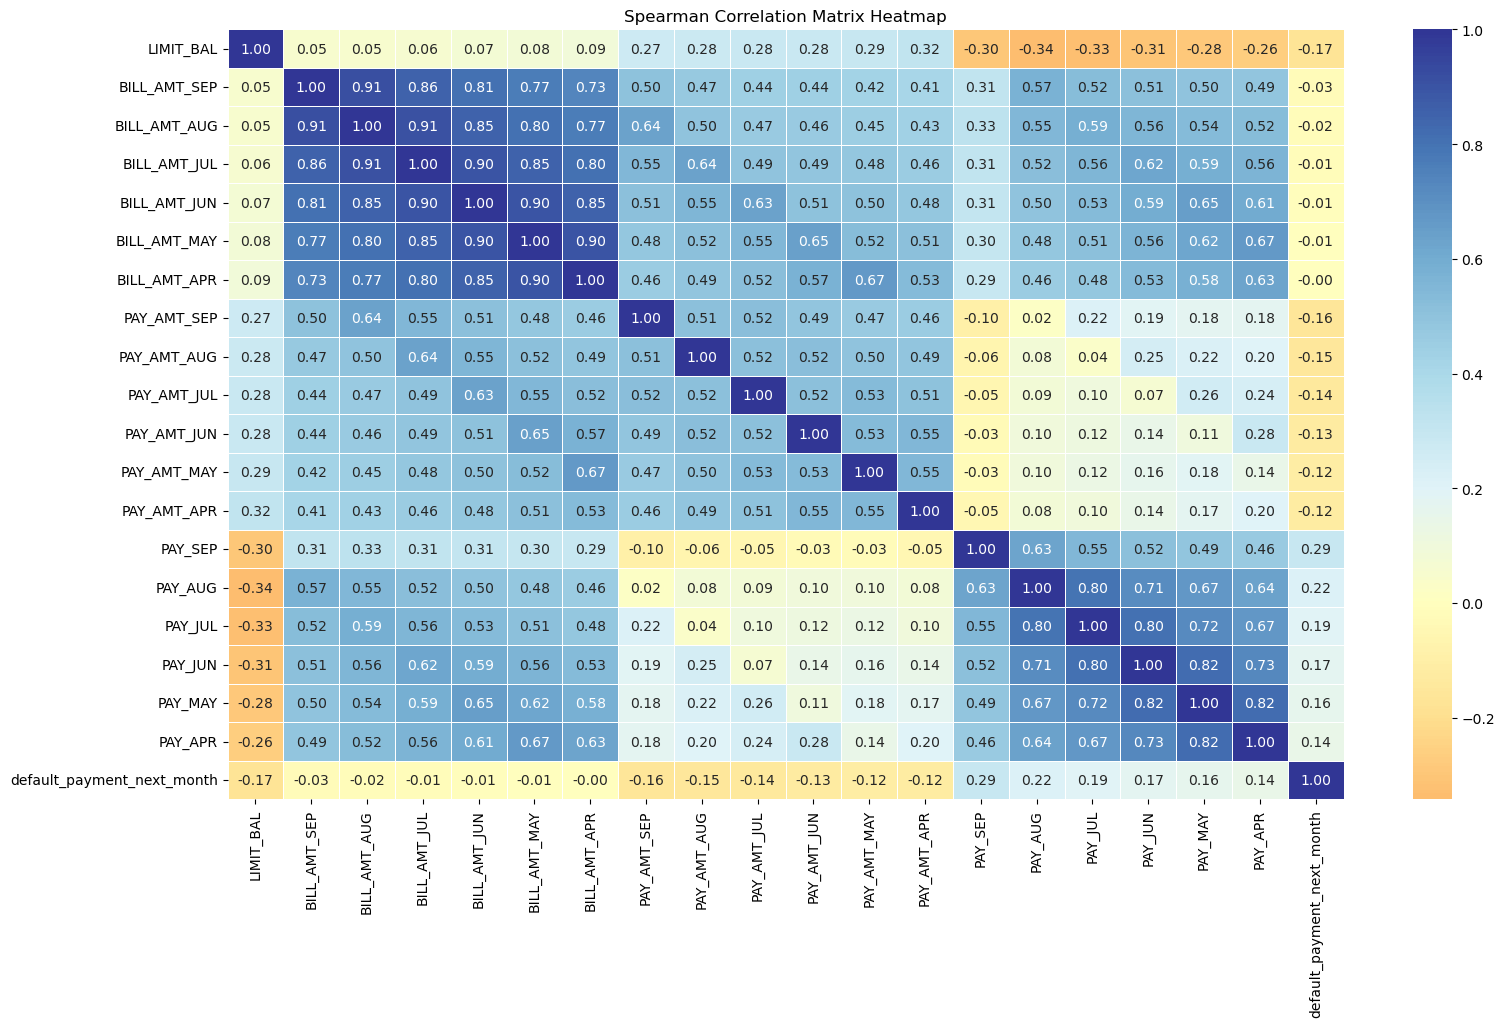

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the numerical and ordinal variables (excluding purely categorical ones)
numerical_and_ordinal_vars = ['LIMIT_BAL',
                              'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
                              'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
                              'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
                              'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
                              'PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR',
                              'default_payment_next_month']

# Compute the Spearman correlation matrix
spearman_corr_matrix = df[numerical_and_ordinal_vars].corr(method='spearman')

# Set figure size
figure = plt.figure(figsize=(18, 10))

# Create heatmap
heatmap = sns.heatmap(spearman_corr_matrix,
                      annot=True, fmt=".2f", cmap='RdYlBu', center=0,
                      linewidths=0.5, cbar=True)

# Add a title
title = plt.title('Spearman Correlation Matrix Heatmap')

# Display the heatmap
plt.show()

The Spearman correlation matrix reaffirms key findings from our previous analysis and provides further validation for feature importance in predicting credit default.   
As expected, repayment status (`PAY_`) and payment amounts (`PAY_AMT_`) exhibit the strongest correlations with credit default, reinforcing the idea that **recent missed payments** and **lower payment amounts** are critical warning signals for default risk. In contrast, bill amounts (`BILL_AMT_*`) show weak, almost zero correlations with default status, suggesting that merely having a high bill does not significantly increase the likelihood of default.

Additionally, we observe high multicollinearity within the same variable groups across months—bill amounts, payment amounts, and repayment statuses are all strongly correlated within their respective groups. This highlights the need for feature engineering to reduce redundancy, such as applying weighted trends to check if the predictive power can be improved or not.(*This will also be affected from the ML or DL algorithm we will choose*).

We also observe the negative correlation of credit limit (`LIMIT_BAL`) with default which was already spotted in the previous steps of the analysis, indicating that customers with lower credit limits tend to default more frequently.

**It is essential to note that correlation does not imply causation. The associations observed here may reflect underlying or unmeasured factors — such as client income, client savings, employment stability, or prior credit history. Drawing causal conclusions would require additional personal financial data that captures these potential confounders, which is not available in this specific dataset**

### <a id='toc1_3_9_'></a>[Final Summary of EDA Insights](#toc0_)

Our Exploratory Data Analysis (EDA) provided crucial insights into the dataset, revealing key patterns, relationships, and potential challenges for modeling. Below are the main takeaways:

Target Imbalance

- The dataset shows a moderate class imbalance, with approximately 22% of clients defaulting. This imbalance should be considered during model training and evaluation, especially for metrics like accuracy, precision and recall.

Key Predictive Signals

- Repayment status variables (PAY_*) exhibit the strongest correlation with default, highlighting recent payment behavior as the most critical factor.

- Payment amounts (PAY_AMT_*) are moderately correlated with default risk — lower recent payments are associated with higher likelihood of default.

- Bill amounts (BILL_AMT_*), though large in magnitude, show weaker association with default, suggesting that high bills alone do not increase credit risk.

- Credit limit (LIMIT_BAL) shows a negative association with default risk — defaulters tend to be concentrated in the lower credit limit ranges, possibly reflecting lower financial flexibility or risk-based credit card limit assignment.

Multicollinearity & Temporal Patterns

- Strong multicollinearity is observed among PAY_*, BILL_AMT_*, and PAY_AMT_* variables across months. This temporal redundancy presents an opportunity for exploration with feature aggregation (e.g., weighted trends or ratios especially if modeling with less complex models).

Temporal Trends

- Clients who ultimately default tend to accumulate higher unpaid bills and make consistently lower payments across months, as visualized in temporal trend plots.

Demographic Effects   
- Variables such as education level, marital status, and age group show varying patterns of default, but these are less predictive than behavioral features. Further expolation is needed with interaction terms that may uncover valuable signal, but can also confuse the trained model. (this is an iterative process)

Outlier Strategy

- Visualizations reveal heavy right skewness and numerous outliers in bill/payment amounts. These are retained as genuine financial records rather than removed, preserving real-world variability.

Causality and Correlation Caveat

While several features are associated with default, we caution that correlation does not imply causation. Unobserved variables like income or employment stability may influence both predictors and outcomes. 

## <a id='toc1_4_'></a>[References & Further Reading](#toc0_)



Machine Learning Workflow
- [The Machine Learning Life Cycle Explained](https://www.datacamp.com/blog/machine-learning-lifecycle-explained)  
- [A Beginner's Guide to The Machine Learning Workflow](https://www.datacamp.com/blog/a-beginner-s-guide-to-the-machine-learning-workflow)

Chi-square test of independence
- [Chi-Square Test of Independence](https://www.scribbr.com/statistics/chi-square-test-of-independence/)

Mann–Whitney U test
- [Mann–Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)   

Kolmogorov-Smirnov (KS) test  
- [Kolmogorov-Smirnov (KS) test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)

Data Leakage in ML   
- [Data Leakage in Machine Learning](https://machinelearningmastery.com/data-leakage-machine-learning/)

Multicollinearity    
- [What is Multicollinearity? Understand Causes, Effects and Detection Using VIF](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/)